In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 0

In [9]:
acc0 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10140000283718109, 0.10100000351667404, 0.125, 0.18140000104904175, 0.1315000057220459, 0.17560000717639923, 0.10130000114440918, 0.1526000052690506, 0.1023000031709671, 0.10100000351667404, 0.16609999537467957, 0.10159999877214432, 0.1014999970793724, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10350000113248825, 0.10260000079870224, 0.1396999955177307, 0.10119999945163727, 0.10320000350475311, 0.10329999774694443, 0.10320000350475311, 0.10100000351667404, 0.10320000350475311, 0.11060000211000443, 0.10639999806880951, 0.10100000351667404, 0.11299999803304672, 0.10130000114440918], [0.10100000351667404, 0.10109999775886536, 0.10090000182390213, 0.10109999775886536, 0.10100000351667404, 0.10100000351667404, 0.10140000283718109, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10090000182390213, 0.10119999945163727, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10080000013113022, 0.1039000004529953, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.1005999967455864, 0.10100000351667404, 0.10109999775886536, 0.10100000351667404, 0.1006999984383583, 0.10100000351667404, 0.1005999967455864, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.11349999904632568], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.09220000356435776, 0.09200000017881393, 0.0934000015258789, 0.09239999949932098, 0.09149999916553497, 0.0908999964594841, 0.0957999974489212, 0.09080000221729279, 0.09149999916553497, 0.09109999984502792, 0.09120000153779984, 0.09059999883174896, 0.0908999964594841, 0.08980000019073486, 0.09109999984502792, 0.09059999883174896, 0.09139999747276306, 0.09139999747276306, 0.09470000118017197, 0.08990000188350677, 0.09109999984502792, 0.09099999815225601, 0.09000000357627869, 0.09070000052452087, 0.09099999815225601, 0.09049999713897705, 0.0917000025510788, 0.09160000085830688, 0.09109999984502792, 0.09239999949932098], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.09470000118017197, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08959999680519104, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.09589999914169312, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.1023000031709671, 0.10199999809265137, 0.10239999741315842, 0.10249999910593033, 0.10209999978542328, 0.10289999842643738, 0.10279999673366547, 0.10189999639987946, 0.10249999910593033, 0.10249999910593033, 0.10239999741315842, 0.10239999741315842, 0.10189999639987946, 0.1023000031709671, 0.1023000031709671, 0.10220000147819519, 0.10260000079870224, 0.10239999741315842, 0.10180000215768814, 0.10239999741315842, 0.10270000249147415, 0.10239999741315842, 0.10249999910593033, 0.10239999741315842, 0.10239999741315842, 0.10170000046491623, 0.10249999910593033, 0.1023000031709671, 0.10249999910593033, 0.10209999978542328], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547]]
loss0 = [[227.0196533203125, 220.5282440185547, 225.0218505859375, 230.02609252929688, 234.75807189941406, 238.55384826660156, 234.43557739257812, 240.01918029785156, 240.89212036132812, 227.6810760498047, 226.2813262939453, 236.06198120117188, 241.23370361328125, 216.31398010253906, 219.8103485107422, 247.85960388183594, 232.5718536376953, 225.22132873535156, 209.59274291992188, 251.16209411621094, 239.82875061035156, 225.6516571044922, 227.67066955566406, 223.18089294433594, 219.13682556152344, 239.17837524414062, 236.96902465820312, 241.9926300048828, 229.97817993164062, 224.261474609375], [220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875, 220.735107421875], [3.0789947509765625, 3.1283206939697266, 3.0529732704162598, 3.117150068283081, 3.15836763381958, 2.998866319656372, 2.932662010192871, 3.113187789916992, 3.2283174991607666, 3.042320966720581, 3.16312313079834, 3.0928454399108887, 3.012259006500244, 3.2351815700531006, 3.211073398590088, 3.045666217803955, 3.1859803199768066, 3.0539731979370117, 3.182321786880493, 3.1116178035736084, 3.1018664836883545, 3.131998300552368, 3.05615234375, 3.0864880084991455, 3.1030073165893555, 3.008103370666504, 3.1955857276916504, 3.0645787715911865, 3.2871639728546143, 3.0165772438049316], [149.9015350341797, 152.43104553222656, 157.10382080078125, 150.45762634277344, 150.56080627441406, 149.41893005371094, 150.02407836914062, 157.82058715820312, 149.2818603515625, 153.21353149414062, 154.91653442382812, 152.17396545410156, 150.355224609375, 152.8450164794922, 155.73025512695312, 156.94630432128906, 151.43296813964844, 154.41786193847656, 146.5191650390625, 152.53245544433594, 148.29107666015625, 155.84765625, 154.76202392578125, 153.41824340820312, 156.546630859375, 158.7831573486328, 152.04788208007812, 152.212646484375, 161.22100830078125, 156.76553344726562], [2.302509069442749, 2.302659034729004, 2.3026371002197266, 2.302621841430664, 2.302640676498413, 2.3027706146240234, 2.3023316860198975, 2.302319049835205, 2.302495241165161, 2.3028476238250732, 2.3027849197387695, 2.302574872970581, 2.3031437397003174, 2.3040754795074463, 2.3025388717651367, 2.303302049636841, 2.3027663230895996, 2.302417039871216, 2.302971601486206, 2.3023149967193604, 2.3047101497650146, 2.3027777671813965, 2.3025619983673096, 2.3025598526000977, 2.3024699687957764, 2.303413152694702, 2.3023743629455566, 2.302203416824341, 2.3024487495422363, 2.3027241230010986], [14.748485565185547, 16.50612449645996, 17.217836380004883, 15.417168617248535, 15.116813659667969, 15.463454246520996, 15.309773445129395, 15.778374671936035, 16.734804153442383, 15.240212440490723, 15.554339408874512, 14.80343246459961, 16.31708335876465, 16.115917205810547, 14.589963912963867, 16.034561157226562, 15.034690856933594, 18.1906795501709, 18.095413208007812, 16.317583084106445, 15.948538780212402, 15.5077486038208, 17.122438430786133, 16.101619720458984, 15.124667167663574, 14.7294921875, 14.086458206176758, 15.487089157104492, 16.03177833557129, 15.712756156921387], [2.3017711639404297, 2.301727771759033, 2.3015551567077637, 2.301751136779785, 2.3018457889556885, 2.301751136779785, 2.301607608795166, 2.3018240928649902, 2.301650047302246, 2.3018152713775635, 2.301750659942627, 2.3018274307250977, 2.3016765117645264, 2.3015549182891846, 2.3017656803131104, 2.3018295764923096, 2.3018479347229004, 2.301632881164551, 2.301518678665161, 2.3017497062683105, 2.3017334938049316, 2.3017022609710693, 2.3018221855163574, 2.301805019378662, 2.3018617630004883, 2.301828622817993, 2.3017380237579346, 2.301764726638794, 2.301710844039917, 2.3017234802246094], [5.510031223297119, 4.803704261779785, 5.102652549743652, 5.164851188659668, 5.167296886444092, 5.090964317321777, 5.426929473876953, 5.079124450683594, 5.14943265914917, 5.151427268981934, 4.7102766036987305, 5.4737114906311035, 5.516317844390869, 4.35990571975708, 4.528450012207031, 4.1939897537231445, 5.248060703277588, 5.29191780090332, 5.027266025543213, 5.362150192260742, 3.9593262672424316, 5.254998683929443, 4.433996677398682, 5.367110729217529, 4.458745956420898, 5.320847511291504, 5.159353733062744, 4.949982643127441, 5.075582981109619, 5.376601696014404], [2.3010873794555664, 2.301570415496826, 2.3024182319641113, 2.301419973373413, 2.3023552894592285, 2.3011364936828613, 2.302034378051758, 2.3016891479492188, 2.3009371757507324, 2.3017683029174805, 2.3018674850463867, 2.302114963531494, 2.302363395690918, 2.3017280101776123, 2.3016419410705566, 2.301543951034546, 2.3025221824645996, 2.3021838665008545, 2.3010261058807373, 2.300987482070923, 2.3006465435028076, 2.3018651008605957, 2.3014118671417236, 2.302285671234131, 2.301708459854126, 2.302499771118164, 2.3021342754364014, 2.302255868911743, 2.3008534908294678, 2.302445411682129], [7.7199506759643555, 7.361545085906982, 7.27137565612793, 6.750425815582275, 7.068828105926514, 7.525329113006592, 7.726787567138672, 7.317422866821289, 7.233858585357666, 7.132522106170654, 6.966472625732422, 7.291523456573486, 7.152331352233887, 6.943086624145508, 7.972395420074463, 7.784416198730469, 7.354800701141357, 7.405886173248291, 7.799642086029053, 7.9982099533081055, 8.147481918334961, 7.321409225463867, 7.524000644683838, 7.824082851409912, 7.370530605316162, 7.114897727966309, 6.410208225250244, 7.442907810211182, 7.466473579406738, 7.734449863433838], [2.3049116134643555, 2.304774284362793, 2.3048245906829834, 2.305002212524414, 2.304771900177002, 2.305307149887085, 2.3049700260162354, 2.3050389289855957, 2.3050897121429443, 2.3049137592315674, 2.3051040172576904, 2.3049609661102295, 2.3046371936798096, 2.3051905632019043, 2.3052120208740234, 2.3051276206970215, 2.305192470550537, 2.304651975631714, 2.3049888610839844, 2.305037021636963, 2.304854393005371, 2.305140256881714, 2.304750680923462, 2.3050339221954346, 2.305145502090454, 2.3049817085266113, 2.3051838874816895, 2.304828405380249, 2.3052871227264404, 2.305109739303589], [16.742341995239258, 16.39748191833496, 16.045455932617188, 16.000324249267578, 16.51534652709961, 16.5208683013916, 16.20623779296875, 16.63099479675293, 16.275365829467773, 16.236143112182617, 16.565658569335938, 16.1922550201416, 16.369384765625, 16.375194549560547, 16.35415267944336, 16.33792495727539, 16.625944137573242, 16.224172592163086, 16.431289672851562, 16.405466079711914, 16.572132110595703, 16.735872268676758, 17.181232452392578, 16.86309051513672, 16.473825454711914, 16.11370849609375, 15.877606391906738, 16.372325897216797, 16.717214584350586, 16.145490646362305], [2.3129286766052246, 2.3114185333251953, 2.957554817199707, 2.3097715377807617, 2.3128652572631836, 2.312633514404297, 2.311980962753296, 2.3107056617736816, 2.3126678466796875, 2.311255693435669, 2.3100180625915527, 2.3108553886413574, 2.312422752380371, 2.312645196914673, 2.3101491928100586, 2.3107943534851074, 2.312537431716919, 2.9138755798339844, 2.3129143714904785, 2.3122003078460693, 2.3106918334960938, 2.3117239475250244, 2.3090696334838867, 2.312511444091797, 2.312936305999756, 2.3097825050354004, 2.313534736633301, 2.3107032775878906, 2.3128345012664795, 2.8846418857574463], [23.04779815673828, 23.428369522094727, 23.852230072021484, 23.98151206970215, 23.256298065185547, 22.74715232849121, 23.47456932067871, 23.415658950805664, 23.069324493408203, 22.37265396118164, 22.22661018371582, 23.28445816040039, 22.895111083984375, 22.823732376098633, 23.042509078979492, 23.098541259765625, 23.62060546875, 23.06850242614746, 23.668163299560547, 22.443056106567383, 22.93004035949707, 23.78413200378418, 22.789926528930664, 23.523632049560547, 23.730113983154297, 22.674665451049805, 23.749309539794922, 23.171382904052734, 23.237943649291992, 24.002885818481445], [2.4062657356262207, 2.413705587387085, 2.4099485874176025, 2.4110255241394043, 2.409693717956543, 2.4034459590911865, 2.4185218811035156, 2.4000184535980225, 2.4110300540924072, 2.4091339111328125, 2.4146552085876465, 2.4101080894470215, 2.407400608062744, 2.4023382663726807, 2.411104679107666, 2.402827262878418, 2.40828537940979, 2.408055067062378, 2.4189393520355225, 2.405066967010498, 2.4128780364990234, 2.4096009731292725, 2.399362802505493, 2.405703067779541, 2.4094250202178955, 2.403841018676758, 2.410369396209717, 2.408231019973755, 2.4100053310394287, 2.410146474838257], [34.92342758178711, 35.4410514831543, 34.837310791015625, 35.46144485473633, 35.91240310668945, 35.3129997253418, 36.434478759765625, 35.60258865356445, 35.9182243347168, 36.2505989074707, 35.82057571411133, 35.82417297363281, 35.87101364135742, 36.18252944946289, 35.824432373046875, 34.852237701416016, 35.87882614135742, 34.39348220825195, 35.82715606689453, 36.00655746459961, 35.556427001953125, 35.934364318847656, 35.35346221923828, 34.59536361694336, 35.81843948364258, 35.719764709472656, 35.897579193115234, 35.862911224365234, 35.73609924316406, 35.70857238769531], [2.4546704292297363, 2.4495248794555664, 2.4571521282196045, 2.4583194255828857, 2.4529240131378174, 2.45696759223938, 2.451122522354126, 2.4583253860473633, 2.459843397140503, 2.453956127166748, 2.4408726692199707, 2.4524290561676025, 2.45343017578125, 2.4515745639801025, 2.4597465991973877, 2.4583542346954346, 2.455444097518921, 2.4501028060913086, 2.454230546951294, 2.444716453552246, 2.4504973888397217, 2.4591903686523438, 2.4586684703826904, 2.4533073902130127, 2.455939769744873, 2.454160213470459, 2.4523074626922607, 2.445258378982544, 2.447765827178955, 2.4500157833099365], [2.6412296295166016, 2.663706064224243, 2.6410696506500244, 2.6130993366241455, 2.577589750289917, 2.5984816551208496, 2.651338815689087, 2.6216177940368652, 2.7199182510375977, 2.677034616470337, 2.603072166442871, 2.676863431930542, 2.5576913356781006, 2.6489291191101074, 2.6253018379211426, 2.674889326095581, 2.6194381713867188, 2.653223752975464, 2.5983617305755615, 2.6668124198913574, 2.6326067447662354, 2.6411678791046143, 2.5797195434570312, 2.623028039932251, 2.561631917953491, 2.562199115753174, 2.6946654319763184, 2.629159688949585, 2.6935718059539795, 2.5942418575286865], [2.3042681217193604, 2.3041107654571533, 2.304219961166382, 2.3042750358581543, 2.304189920425415, 2.3045032024383545, 2.304302453994751, 2.304225206375122, 2.304413318634033, 2.3042361736297607, 2.304222345352173, 2.3042962551116943, 2.304180383682251, 2.304241895675659, 2.3042151927948, 2.3041887283325195, 2.3042490482330322, 2.3042030334472656, 2.3041868209838867, 2.3042473793029785, 2.304219961166382, 2.3042261600494385, 2.3043107986450195, 2.3042678833007812, 2.304283618927002, 2.3042654991149902, 2.3041858673095703, 2.304264783859253, 2.3042430877685547, 2.3043015003204346], [3.2445530891418457, 3.23927640914917, 3.2418618202209473, 3.1826894283294678, 3.1885666847229004, 3.275374412536621, 3.1865651607513428, 3.2146596908569336, 3.2058563232421875, 3.1956169605255127, 3.1492536067962646, 3.2176918983459473, 3.249577283859253, 3.2756850719451904, 3.191370964050293, 3.196610689163208, 3.2102391719818115, 3.2477028369903564, 3.211566686630249, 3.2612266540527344, 3.1985015869140625, 3.2275683879852295, 3.1943342685699463, 3.0945370197296143, 3.203282117843628, 3.156864643096924, 3.233550548553467, 3.2199316024780273, 3.220475673675537, 3.200697660446167]] 

acc1 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.0478999987244606, 0.10249999910593033, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.04960000142455101, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10970000177621841, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.029100000858306885, 0.10320000350475311, 0.10180000215768814, 0.10320000350475311, 0.10320000350475311, 0.07819999754428864], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404]]
loss1 = [[240.77589416503906, 249.46237182617188, 237.43887329101562, 235.36709594726562, 247.39462280273438, 241.67002868652344, 236.66168212890625, 230.8388214111328, 249.905029296875, 235.94265747070312, 245.10287475585938, 241.26304626464844, 235.84934997558594, 233.13975524902344, 234.3226318359375, 245.16470336914062, 252.89990234375, 250.1532440185547, 239.5326690673828, 240.79747009277344, 245.71835327148438, 236.8412322998047, 251.58184814453125, 242.84677124023438, 249.3291015625, 248.13604736328125, 241.19444274902344, 244.84637451171875, 240.0355987548828, 251.46287536621094], [234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125, 234.5147705078125], [2.3472073078155518, 2.3501110076904297, 2.353253126144409, 2.340834856033325, 2.3599534034729004, 2.3464720249176025, 2.3649792671203613, 2.3529205322265625, 2.359437942504883, 2.354759454727173, 2.35752272605896, 2.3486390113830566, 2.3693628311157227, 2.346146583557129, 2.353651285171509, 2.341623067855835, 2.3597970008850098, 2.376431703567505, 2.3427062034606934, 2.3598270416259766, 2.36708927154541, 2.3655126094818115, 2.3608288764953613, 2.3694663047790527, 2.3520803451538086, 2.3547773361206055, 2.3469736576080322, 2.3441314697265625, 2.3491506576538086, 2.362593650817871], [150.1731719970703, 148.90794372558594, 148.81944274902344, 149.66673278808594, 147.76454162597656, 151.03497314453125, 151.36436462402344, 147.68734741210938, 151.07981872558594, 149.85252380371094, 149.09544372558594, 151.28880310058594, 152.90261840820312, 148.1923065185547, 152.90704345703125, 154.35581970214844, 153.54039001464844, 146.13340759277344, 152.1224365234375, 150.531494140625, 148.1304931640625, 151.2803955078125, 150.2021942138672, 147.60443115234375, 150.2736053466797, 154.48301696777344, 148.3683319091797, 146.1565704345703, 148.02227783203125, 150.3763885498047], [2.300882339477539, 2.300961494445801, 2.300950288772583, 2.3008909225463867, 2.3009371757507324, 2.3009111881256104, 2.3009157180786133, 2.3009033203125, 2.300930976867676, 2.3009047508239746, 2.3009719848632812, 2.3008904457092285, 2.3009684085845947, 2.300950765609741, 2.3009562492370605, 2.3008229732513428, 2.300917863845825, 2.300887107849121, 2.300873041152954, 2.300877332687378, 2.3009276390075684, 2.3009324073791504, 2.300875663757324, 2.300814151763916, 2.300917863845825, 2.300968885421753, 2.30090594291687, 2.3007819652557373, 2.300957202911377, 2.3008949756622314], [2.3020143508911133, 2.3020145893096924, 2.302098274230957, 2.3020148277282715, 2.302243947982788, 2.3024117946624756, 2.3020148277282715, 2.3020150661468506, 2.3020145893096924, 2.3020126819610596, 2.3033864498138428, 2.3027217388153076, 2.3020145893096924, 2.3024957180023193, 2.3021459579467773, 2.3020143508911133, 2.3033461570739746, 2.3022382259368896, 2.3020148277282715, 2.302015781402588, 2.3027126789093018, 2.3020153045654297, 2.3025267124176025, 2.302457094192505, 2.3038151264190674, 2.3020031452178955, 2.3020639419555664, 2.302063226699829, 2.3020145893096924, 2.303034543991089], [2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758, 2.302034378051758], [2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635, 2.3021814823150635], [2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158, 2.302246570587158], [2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872, 2.302455186843872], [2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445, 2.3028764724731445], [2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104, 2.3034746646881104], [2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395, 2.3035359382629395], [2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428, 2.3037526607513428], [2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575, 2.303542375564575], [2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492, 2.303495407104492], [2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154, 2.3034255504608154], [2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127, 2.3035271167755127], [2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096, 2.3032944202423096], [2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633, 2.303224563598633]] 

acc2 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.11559999734163284, 0.11349999904632568, 0.10320000350475311, 0.1256999969482422, 0.11349999904632568, 0.10329999774694443, 0.11620000004768372, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.10320000350475311, 0.10320000350475311, 0.1137000024318695, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10320000350475311, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10540000349283218, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.09560000151395798, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.09570000320672989, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.09570000320672989, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.09740000218153, 0.10279999673366547]]
loss2 = [[196.38153076171875, 201.2936248779297, 200.13185119628906, 195.82705688476562, 204.00411987304688, 193.8161163330078, 191.37545776367188, 194.28733825683594, 191.12718200683594, 199.81634521484375, 200.655517578125, 194.82627868652344, 210.3561553955078, 192.73068237304688, 183.75234985351562, 196.22586059570312, 208.28421020507812, 191.5326385498047, 190.9256591796875, 186.44395446777344, 197.1463165283203, 204.59063720703125, 197.44219970703125, 187.55831909179688, 196.71063232421875, 202.472412109375, 183.5397491455078, 195.7740478515625, 199.15115356445312, 203.30499267578125], [190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625, 190.1842041015625], [5.4271016120910645, 5.768648147583008, 5.329171180725098, 5.649112701416016, 5.76605224609375, 5.5515031814575195, 5.848514556884766, 5.429795265197754, 5.489875316619873, 5.600589275360107, 5.899722099304199, 5.664519786834717, 5.556019306182861, 5.998142242431641, 5.631505012512207, 5.675299644470215, 5.596792697906494, 5.793924331665039, 5.737856864929199, 5.622592449188232, 5.218821048736572, 5.413417816162109, 5.400357723236084, 5.420344352722168, 5.488839626312256, 5.604488372802734, 5.332736015319824, 5.5691728591918945, 5.514834880828857, 5.834736347198486], [146.26710510253906, 156.3277587890625, 153.4734649658203, 158.29539489746094, 154.22500610351562, 157.06582641601562, 150.7329864501953, 150.11508178710938, 157.91001892089844, 146.891357421875, 152.55137634277344, 158.48074340820312, 160.9232940673828, 156.02471923828125, 155.44583129882812, 158.02464294433594, 147.53433227539062, 156.95350646972656, 156.6539764404297, 152.7425079345703, 148.6769256591797, 147.35169982910156, 155.31053161621094, 152.19151306152344, 154.50350952148438, 159.36302185058594, 150.2162322998047, 155.55084228515625, 154.95654296875, 156.6709747314453], [2.3019886016845703, 2.30198335647583, 2.301988124847412, 2.3019895553588867, 2.3019895553588867, 2.3019957542419434, 2.301985740661621, 2.301990032196045, 2.301990509033203, 2.301992654800415, 2.3019907474517822, 2.301987409591675, 2.3019938468933105, 2.3019940853118896, 2.3019819259643555, 2.3019802570343018, 2.301996946334839, 2.3019819259643555, 2.3019909858703613, 2.3019959926605225, 2.3019917011260986, 2.3019912242889404, 2.3019912242889404, 2.3019912242889404, 2.3019824028015137, 2.3019840717315674, 2.30198335647583, 2.3019814491271973, 2.3019800186157227, 2.3019845485687256], [2.598151683807373, 4.5349931716918945, 2.3511838912963867, 2.2967891693115234, 2.7669456005096436, 2.3016891479492188, 2.3289830684661865, 2.738321542739868, 3.316319227218628, 2.3491785526275635, 2.3427317142486572, 2.338515043258667, 2.5706992149353027, 2.560936689376831, 2.4137122631073, 4.634937763214111, 5.0749969482421875, 2.46199369430542, 2.838836193084717, 2.368088960647583, 2.469444751739502, 2.560053586959839, 2.3020195960998535, 2.8721604347229004, 2.5784807205200195, 2.450489044189453, 2.3023135662078857, 3.147153377532959, 2.347728967666626, 4.050129413604736], [24.83637809753418, 15.260986328125, 24.498321533203125, 13.257162094116211, 24.231000900268555, 14.505555152893066, 20.75941276550293, 14.288787841796875, 12.786723136901855, 20.01654815673828, 14.104476928710938, 15.642910957336426, 14.787879943847656, 19.71072769165039, 19.168628692626953, 25.681489944458008, 13.130864143371582, 18.83306312561035, 18.93500518798828, 21.092702865600586, 14.31784725189209, 13.739473342895508, 18.78196907043457, 19.881221771240234, 22.96580696105957, 20.339508056640625, 23.461618423461914, 23.843374252319336, 9.308664321899414, 26.545255661010742], [54.38010787963867, 59.589149475097656, 59.4861946105957, 68.42927551269531, 76.95148468017578, 62.541744232177734, 69.64899444580078, 60.04665756225586, 58.924285888671875, 58.67582321166992, 60.29129409790039, 61.12678909301758, 57.665794372558594, 75.47713470458984, 64.34477996826172, 62.501773834228516, 59.55088806152344, 57.94354248046875, 70.86139678955078, 59.329925537109375, 65.0472640991211, 61.402801513671875, 61.39289855957031, 74.85749053955078, 58.86501693725586, 61.70997619628906, 57.77584457397461, 73.08820343017578, 62.06169509887695, 57.66814422607422], [4.231184959411621, 4.247054100036621, 4.224885940551758, 4.309553146362305, 4.188755035400391, 4.331902503967285, 4.263521671295166, 4.256375789642334, 4.309213638305664, 4.20969820022583, 4.282831192016602, 4.338665008544922, 4.411632061004639, 4.274296760559082, 4.2790632247924805, 4.349791049957275, 4.4377827644348145, 4.431293487548828, 4.222934722900391, 4.112517356872559, 4.272529602050781, 4.3374528884887695, 4.147189617156982, 4.204789161682129, 4.401381015777588, 4.205816745758057, 4.281749248504639, 4.216706275939941, 4.26826286315918, 4.322044372558594], [48.908260345458984, 48.23778533935547, 52.00599670410156, 49.47873306274414, 50.39237976074219, 53.308937072753906, 50.96860122680664, 51.038429260253906, 50.79145812988281, 50.90147399902344, 49.56501388549805, 52.37027359008789, 51.15729522705078, 50.955814361572266, 51.7264518737793, 47.48642349243164, 51.06984329223633, 52.18292999267578, 49.0126953125, 48.2328987121582, 51.59564208984375, 49.7194709777832, 49.7745361328125, 51.214256286621094, 50.2092170715332, 50.045135498046875, 52.015350341796875, 52.14334487915039, 50.574771881103516, 52.149925231933594], [2.3214290142059326, 2.321661949157715, 2.3227407932281494, 2.3227782249450684, 2.32340931892395, 2.322561502456665, 2.320610523223877, 2.3215513229370117, 2.3207108974456787, 2.3211686611175537, 2.3193249702453613, 2.3201847076416016, 2.3207969665527344, 2.320834159851074, 2.3217709064483643, 2.319373607635498, 2.3211913108825684, 2.320901870727539, 2.321693181991577, 2.3198463916778564, 2.322251319885254, 2.3200364112854004, 2.319934129714966, 2.3231661319732666, 2.3234081268310547, 2.3219497203826904, 2.3199520111083984, 2.3210110664367676, 2.3225414752960205, 2.3212637901306152], [16.045677185058594, 15.91355037689209, 14.945195198059082, 15.803644180297852, 15.276793479919434, 15.8709716796875, 14.911860466003418, 15.58613109588623, 15.221940994262695, 15.601520538330078, 15.540966033935547, 15.407733917236328, 15.938236236572266, 15.916473388671875, 15.550095558166504, 16.20284080505371, 15.374612808227539, 15.233258247375488, 15.227272987365723, 15.804330825805664, 15.289371490478516, 15.897087097167969, 15.322006225585938, 15.210607528686523, 15.453343391418457, 15.666358947753906, 14.936885833740234, 15.868234634399414, 15.223292350769043, 15.540606498718262], [2.3168785572052, 2.318422555923462, 2.316652536392212, 2.3164703845977783, 2.317018985748291, 2.316370964050293, 2.315591335296631, 2.317021369934082, 2.3166959285736084, 2.3167219161987305, 2.3170502185821533, 2.3170948028564453, 2.3171021938323975, 2.3161356449127197, 2.317016839981079, 2.3170785903930664, 2.3170106410980225, 2.3170580863952637, 2.316251277923584, 2.3172338008880615, 2.3165273666381836, 2.3160030841827393, 2.315786600112915, 2.3160111904144287, 2.315323829650879, 2.3168094158172607, 2.3178389072418213, 2.318171977996826, 2.317319393157959, 2.3170790672302246], [46.852474212646484, 48.1160888671875, 45.57160186767578, 45.315608978271484, 47.07694625854492, 46.22349548339844, 46.370487213134766, 47.083858489990234, 45.899559020996094, 45.946739196777344, 49.954383850097656, 47.571861267089844, 46.21061706542969, 48.067813873291016, 46.94786071777344, 49.299781799316406, 46.96797180175781, 46.422821044921875, 48.61603927612305, 46.826210021972656, 47.00785446166992, 46.69244384765625, 46.34611511230469, 47.32073211669922, 44.65435028076172, 48.377193450927734, 44.68949890136719, 47.09016799926758, 44.773338317871094, 45.49724578857422], [2.3355374336242676, 2.3338379859924316, 2.3363518714904785, 2.336167097091675, 2.3353190422058105, 2.334759473800659, 2.3352115154266357, 2.3374509811401367, 2.335665225982666, 2.335496425628662, 2.3364696502685547, 2.3344569206237793, 2.336036443710327, 2.335761308670044, 2.335564374923706, 2.336836576461792, 2.334752321243286, 2.3366124629974365, 2.332061290740967, 2.3360037803649902, 2.33490252494812, 2.334981679916382, 2.335207462310791, 2.336211919784546, 2.335641622543335, 2.337977886199951, 2.3367390632629395, 2.336796760559082, 2.3334641456604004, 2.3366880416870117], [35.60295867919922, 35.69068908691406, 37.47138595581055, 36.8492546081543, 37.74152374267578, 36.24789047241211, 37.616329193115234, 36.42152404785156, 36.64905548095703, 36.37275314331055, 37.74043655395508, 37.22100067138672, 36.60266876220703, 36.84132766723633, 36.742889404296875, 38.0427360534668, 36.121795654296875, 37.65514373779297, 36.80672836303711, 36.76224899291992, 37.03059005737305, 36.804141998291016, 37.766239166259766, 36.77946853637695, 36.657814025878906, 37.1297492980957, 36.3989372253418, 36.988101959228516, 36.56503677368164, 37.13002014160156], [2.321227550506592, 2.3214235305786133, 2.3241519927978516, 2.322486400604248, 2.3227651119232178, 2.3224568367004395, 2.324514865875244, 2.321321487426758, 2.322436809539795, 2.322200298309326, 2.3235926628112793, 2.3229081630706787, 2.321342945098877, 2.321377992630005, 2.322507381439209, 2.3230717182159424, 2.324989080429077, 2.3214340209960938, 2.3229081630706787, 2.3240110874176025, 2.322681427001953, 2.3217086791992188, 2.3221168518066406, 2.3224432468414307, 2.3222262859344482, 2.3230533599853516, 2.3227598667144775, 2.322415590286255, 2.3231360912323, 2.3234329223632812], [4.1137166023254395, 4.148341178894043, 4.052126884460449, 4.057888031005859, 3.8477160930633545, 3.7320597171783447, 3.861997365951538, 3.857189416885376, 3.9041597843170166, 3.943908929824829, 3.8917274475097656, 4.048448085784912, 3.854227304458618, 4.169929504394531, 3.8129661083221436, 3.920128583908081, 3.8847625255584717, 3.9527039527893066, 3.9286093711853027, 3.9305241107940674, 3.863555908203125, 3.8302793502807617, 3.844867467880249, 3.83455228805542, 3.879589557647705, 4.009286880493164, 3.8592350482940674, 3.9031269550323486, 4.129580020904541, 3.8858284950256348], [2.303846836090088, 2.3038716316223145, 2.3038523197174072, 2.3037848472595215, 2.3038909435272217, 2.303760290145874, 2.3038454055786133, 2.3038244247436523, 2.3038904666900635, 2.3038525581359863, 2.303842067718506, 2.3038792610168457, 2.3039157390594482, 2.3038504123687744, 2.303823471069336, 2.303884506225586, 2.303797960281372, 2.3037829399108887, 2.3038318157196045, 2.303837299346924, 2.303844451904297, 2.303778648376465, 2.303894281387329, 2.3038651943206787, 2.30383563041687, 2.303880214691162, 2.3038411140441895, 2.3038532733917236, 2.3038954734802246, 2.3038547039031982], [2.70104718208313, 2.6677117347717285, 2.6703948974609375, 2.703639507293701, 3.0834579467773438, 2.7117714881896973, 2.7338597774505615, 2.7696943283081055, 2.7624564170837402, 2.644282102584839, 2.694692373275757, 2.6976895332336426, 2.992525100708008, 2.7059645652770996, 2.9065299034118652, 2.762784719467163, 2.7958292961120605, 2.7374954223632812, 2.6723201274871826, 2.6740005016326904, 2.8567802906036377, 2.973620891571045, 2.776775598526001, 2.72904109954834, 2.7490272521972656, 2.7898740768432617, 2.817533254623413, 2.756774663925171, 3.3325114250183105, 2.734520196914673]] 

acc3 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.10100000351667404, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10740000009536743, 0.10119999945163727, 0.10360000282526016, 0.09510000050067902, 0.10260000079870224, 0.10010000318288803, 0.10350000113248825, 0.1005999967455864, 0.10199999809265137, 0.09920000284910202, 0.10189999639987946, 0.1006999984383583, 0.10119999945163727, 0.10100000351667404, 0.10040000081062317, 0.10170000046491623, 0.10180000215768814, 0.10010000318288803, 0.10270000249147415, 0.10270000249147415, 0.09870000183582306, 0.10090000182390213, 0.10000000149011612, 0.10379999876022339, 0.09780000150203705, 0.10050000250339508, 0.10180000215768814, 0.10209999978542328, 0.09920000284910202, 0.09939999878406525], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547]]
loss3 = [[196.71865844726562, 210.3250732421875, 202.5811309814453, 209.92967224121094, 208.85897827148438, 209.18939208984375, 202.71328735351562, 209.99734497070312, 202.25759887695312, 204.3906707763672, 203.15811157226562, 203.10719299316406, 207.4757080078125, 209.17567443847656, 206.30267333984375, 219.8216552734375, 201.65721130371094, 208.71180725097656, 208.7916259765625, 206.09788513183594, 204.1914520263672, 212.1803436279297, 222.8592529296875, 204.18089294433594, 205.803955078125, 202.3065948486328, 215.34352111816406, 210.94976806640625, 209.29629516601562, 230.28782653808594], [200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688, 200.75607299804688], [2.302124500274658, 2.664033889770508, 2.8151767253875732, 2.3021509647369385, 2.302138090133667, 2.3021414279937744, 2.7487452030181885, 2.3021111488342285, 2.6911680698394775, 2.786158323287964, 2.75327730178833, 2.736342430114746, 2.3021180629730225, 2.774524688720703, 2.8649911880493164, 2.3020899295806885, 2.3021345138549805, 2.821084976196289, 2.3021011352539062, 2.736117362976074, 2.817814588546753, 2.30212140083313, 2.8358678817749023, 2.7647714614868164, 2.3021247386932373, 2.7951061725616455, 2.888972282409668, 2.3021299839019775, 2.3021862506866455, 2.691589832305908], [169.87342834472656, 170.20164489746094, 176.65061950683594, 169.8324432373047, 180.7799072265625, 175.01828002929688, 176.6597442626953, 171.06793212890625, 173.1717071533203, 166.93043518066406, 165.29507446289062, 169.34765625, 166.49813842773438, 170.1866455078125, 170.32919311523438, 168.4517059326172, 158.33058166503906, 161.8583526611328, 170.14443969726562, 167.8373565673828, 161.0023193359375, 173.24346923828125, 175.26573181152344, 169.27099609375, 170.64248657226562, 166.49351501464844, 168.6774444580078, 170.086181640625, 181.19497680664062, 173.7205047607422], [2.3116488456726074, 2.3124756813049316, 2.3123180866241455, 2.3105626106262207, 2.310718297958374, 2.3110222816467285, 2.3109166622161865, 2.3127996921539307, 2.310689926147461, 2.3115856647491455, 2.3117611408233643, 2.3126049041748047, 2.309846878051758, 2.310760259628296, 2.311687707901001, 2.31260085105896, 2.3117828369140625, 2.310321092605591, 2.311408281326294, 2.3122305870056152, 2.3121047019958496, 2.31227445602417, 2.312617778778076, 2.3132688999176025, 2.3126630783081055, 2.31223726272583, 2.31057071685791, 2.31300950050354, 2.3129444122314453, 2.312385320663452], [44.193206787109375, 46.512725830078125, 44.751678466796875, 45.72361373901367, 48.248504638671875, 44.76128387451172, 44.224273681640625, 44.014976501464844, 43.38487243652344, 47.048336029052734, 44.693363189697266, 45.594173431396484, 45.22074890136719, 45.59491729736328, 42.93536376953125, 46.431968688964844, 45.5848274230957, 45.1610107421875, 44.90830612182617, 46.450721740722656, 44.70345687866211, 45.81348419189453, 47.49552536010742, 44.850006103515625, 45.294403076171875, 43.0764045715332, 47.15279006958008, 45.32282638549805, 46.3455810546875, 45.134925842285156], [2.3019778728485107, 2.301970958709717, 2.3019766807556152, 2.301973581314087, 2.3019869327545166, 2.3019814491271973, 2.3019862174987793, 2.3019821643829346, 2.301974058151245, 2.3019819259643555, 2.3019776344299316, 2.3019766807556152, 2.3019754886627197, 2.301978349685669, 2.3019771575927734, 2.301978349685669, 2.3019769191741943, 2.3019776344299316, 2.3019754886627197, 2.3019766807556152, 2.3019814491271973, 2.3019731044769287, 2.301978826522827, 2.3019766807556152, 2.3019771575927734, 2.3019795417785645, 2.3019771575927734, 2.3019776344299316, 2.3019778728485107, 2.3019766807556152], [2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438, 2.3020858764648438], [2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115, 2.3021581172943115], [2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506, 2.302377223968506], [2.302772283554077, 2.302772283554077, 4.2629241943359375, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 11.739998817443848, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 12.074782371520996, 2.302772283554077, 2.302772283554077, 4.143215179443359, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077, 2.302772283554077], [25.409046173095703, 22.71541976928711, 23.2550106048584, 22.87351417541504, 23.742469787597656, 23.364965438842773, 24.687591552734375, 23.796220779418945, 24.7066650390625, 22.938724517822266, 24.757387161254883, 23.852935791015625, 24.691635131835938, 24.755826950073242, 24.290332794189453, 24.674238204956055, 23.982004165649414, 24.185741424560547, 23.71773910522461, 25.821674346923828, 23.941892623901367, 24.65837287902832, 26.332265853881836, 24.02206802368164, 22.645238876342773, 25.802576065063477, 24.19898223876953, 23.86788558959961, 23.640621185302734, 23.60554313659668], [2.379751443862915, 2.383392572402954, 2.3848726749420166, 2.3814635276794434, 2.3687121868133545, 2.379138946533203, 2.38629150390625, 2.3833398818969727, 2.377464532852173, 2.3907768726348877, 2.390789031982422, 2.3766276836395264, 2.372931480407715, 2.384563684463501, 2.3797760009765625, 2.3810524940490723, 2.385392189025879, 2.3837692737579346, 2.377875566482544, 2.3853068351745605, 2.3802871704101562, 2.37575626373291, 2.3787639141082764, 2.3809659481048584, 2.384880781173706, 2.380366802215576, 2.391476631164551, 2.3866019248962402, 2.3791844844818115, 2.385958671569824], [54.83283615112305, 56.77517318725586, 56.068199157714844, 55.55274963378906, 54.626155853271484, 56.24855041503906, 54.55764389038086, 54.64775085449219, 55.4655876159668, 55.98700714111328, 54.37289810180664, 56.01288604736328, 55.46382522583008, 54.96588897705078, 55.81074905395508, 55.45425033569336, 54.80509948730469, 55.106693267822266, 54.47634506225586, 53.59120559692383, 54.4255485534668, 54.75543212890625, 55.8474235534668, 54.659568786621094, 55.39645767211914, 55.319854736328125, 55.1929931640625, 56.53874969482422, 54.937137603759766, 54.7054328918457], [2.3045713901519775, 2.3049776554107666, 2.304792881011963, 2.305802822113037, 2.3041253089904785, 2.3055386543273926, 2.3037631511688232, 2.304703950881958, 2.3061084747314453, 2.302777051925659, 2.3034069538116455, 2.304621696472168, 2.305119514465332, 2.3030550479888916, 2.30511212348938, 2.3059539794921875, 2.3041086196899414, 2.3046839237213135, 2.3061811923980713, 2.304492950439453, 2.302924633026123, 2.3057425022125244, 2.305809497833252, 2.3043971061706543, 2.3065948486328125, 2.304816246032715, 2.3037350177764893, 2.304251194000244, 2.3055310249328613, 2.3051915168762207], [2.302885055541992, 2.302885055541992, 2.302885055541992, 2.302885055541992, 2.3028855323791504, 2.302885055541992, 2.3028855323791504, 2.3028855323791504, 2.302885055541992, 2.3028855323791504, 2.302885055541992, 2.3028855323791504, 2.3028855323791504, 2.302885055541992, 2.3028855323791504, 2.3028855323791504, 2.3028855323791504, 2.3028855323791504, 2.302885055541992, 2.3028855323791504, 2.302885055541992, 2.302885055541992, 2.3028852939605713, 2.302885055541992, 2.302885055541992, 2.302885055541992, 2.302885055541992, 2.302885055541992, 2.3028855323791504, 2.302885055541992], [2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631, 2.302896022796631], [2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723, 2.3030495643615723], [2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084, 2.30289363861084], [2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938, 2.3028793334960938]] 

acc4 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.0982000008225441], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.09600000083446503, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09690000116825104, 0.09350000321865082, 0.09759999811649323, 0.09749999642372131, 0.094200000166893, 0.09719999879598618, 0.09740000218153, 0.09759999811649323, 0.09679999947547913, 0.09740000218153, 0.09780000150203705, 0.09740000218153, 0.09319999814033508, 0.09279999881982803, 0.09700000286102295, 0.09719999879598618, 0.09350000321865082, 0.09749999642372131, 0.09449999779462814, 0.09740000218153, 0.09809999912977219, 0.09769999980926514, 0.09730000048875809, 0.09730000048875809, 0.09759999811649323, 0.09719999879598618, 0.09790000319480896, 0.09769999980926514, 0.09740000218153, 0.09749999642372131], [0.1005999967455864, 0.11320000141859055, 0.10090000182390213, 0.09380000084638596, 0.10090000182390213, 0.09769999980926514, 0.10869999974966049, 0.11760000139474869, 0.10090000182390213, 0.10270000249147415, 0.1023000031709671, 0.10170000046491623, 0.10090000182390213, 0.12110000103712082, 0.10090000182390213, 0.10090000182390213, 0.10100000351667404, 0.10119999945163727, 0.11219999939203262, 0.10090000182390213, 0.10090000182390213, 0.1014999970793724, 0.10109999775886536, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10109999775886536, 0.10090000182390213]]
loss4 = [[228.84210205078125, 231.48574829101562, 228.5877685546875, 213.95986938476562, 239.0110321044922, 226.7530517578125, 219.19422912597656, 231.09307861328125, 222.52450561523438, 231.78712463378906, 232.8648223876953, 235.8998260498047, 240.76904296875, 224.99452209472656, 226.24111938476562, 221.6217498779297, 223.78114318847656, 213.43637084960938, 227.3131561279297, 232.3605499267578, 226.96124267578125, 211.0440673828125, 227.92156982421875, 223.04812622070312, 209.89474487304688, 224.21707153320312, 219.89419555664062, 211.9784698486328, 236.17501831054688, 214.11239624023438], [217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062, 217.90249633789062], [4.790502548217773, 4.546376705169678, 4.502862453460693, 4.5523881912231445, 4.665955543518066, 4.643486499786377, 4.57172966003418, 4.585330009460449, 4.4985127449035645, 4.696438789367676, 4.623297214508057, 4.638830184936523, 4.580284595489502, 4.51918363571167, 4.588679790496826, 4.634210109710693, 4.6356072425842285, 4.799301624298096, 4.485114574432373, 4.597393989562988, 4.513397216796875, 4.676126003265381, 4.578447341918945, 4.482377529144287, 4.429327964782715, 4.572152137756348, 4.425990104675293, 4.605324745178223, 4.4799485206604, 4.527339458465576], [147.0493621826172, 144.99221801757812, 142.5491943359375, 154.3938446044922, 151.21109008789062, 166.42453002929688, 150.3249053955078, 156.00015258789062, 158.2642059326172, 165.78660583496094, 162.98651123046875, 150.90069580078125, 147.48086547851562, 143.59950256347656, 164.41558837890625, 159.5993194580078, 150.89324951171875, 158.44529724121094, 156.00889587402344, 154.5925750732422, 152.15673828125, 149.16546630859375, 157.8247528076172, 166.51998901367188, 154.51370239257812, 152.63148498535156, 163.12652587890625, 150.1266632080078, 158.1208038330078, 163.60682678222656], [2.3397676944732666, 2.336240768432617, 2.335798740386963, 2.339747190475464, 2.3376588821411133, 2.337251663208008, 2.3371522426605225, 2.340940237045288, 2.336761713027954, 2.339904308319092, 2.3390510082244873, 2.3371381759643555, 2.3396499156951904, 2.337847948074341, 2.338817596435547, 2.3406641483306885, 2.337439775466919, 2.336308240890503, 2.337933301925659, 2.335343837738037, 2.3409464359283447, 2.3383684158325195, 2.337153434753418, 2.3357808589935303, 2.338804244995117, 2.33650541305542, 2.3369688987731934, 2.3396413326263428, 2.3348400592803955, 2.3386826515197754], [47.690128326416016, 46.73068618774414, 47.746482849121094, 47.01150894165039, 47.27376174926758, 47.20647430419922, 48.002254486083984, 46.07221984863281, 48.92117691040039, 47.982994079589844, 48.411739349365234, 46.804508209228516, 48.105716705322266, 45.78012466430664, 47.46348571777344, 48.01460647583008, 49.85762023925781, 45.925079345703125, 48.0038948059082, 49.60299301147461, 47.32286071777344, 46.48978805541992, 47.32966232299805, 46.314910888671875, 48.8380012512207, 48.19392013549805, 44.83442687988281, 46.16211700439453, 46.741153717041016, 47.0278434753418], [2.30643367767334, 2.305525541305542, 2.306807041168213, 2.3054211139678955, 2.3058393001556396, 2.305692434310913, 2.305607557296753, 2.305365800857544, 2.3060123920440674, 2.3049190044403076, 2.3057899475097656, 2.3051650524139404, 2.305471181869507, 2.304814338684082, 2.305288791656494, 2.3053784370422363, 2.3058395385742188, 2.305053949356079, 2.3053178787231445, 2.3059616088867188, 2.3055472373962402, 2.304973840713501, 2.3057801723480225, 2.3056914806365967, 2.306659460067749, 2.30509090423584, 2.3055405616760254, 2.305727005004883, 2.3055760860443115, 2.3054561614990234], [25.45168113708496, 22.82258415222168, 23.87541961669922, 25.728557586669922, 23.40057945251465, 23.646827697753906, 24.84259033203125, 24.98297882080078, 24.106935501098633, 23.875694274902344, 25.169218063354492, 23.566362380981445, 24.758943557739258, 24.012380599975586, 24.66802406311035, 25.15683364868164, 26.171245574951172, 25.33541488647461, 24.686384201049805, 25.24724006652832, 24.737226486206055, 27.65473175048828, 24.966297149658203, 25.066207885742188, 24.582870483398438, 24.437685012817383, 23.09092140197754, 23.48897361755371, 25.462221145629883, 27.259130477905273], [2.3311991691589355, 2.322594165802002, 2.3267908096313477, 2.3297579288482666, 2.3232741355895996, 2.322580575942993, 2.3299453258514404, 2.3234190940856934, 2.323925018310547, 2.3290257453918457, 2.321516275405884, 2.323040246963501, 2.3259124755859375, 2.3230650424957275, 2.324431896209717, 2.328699827194214, 2.327683210372925, 2.321316719055176, 2.3258745670318604, 2.3383822441101074, 2.32673716545105, 2.328824281692505, 2.3230092525482178, 2.323179006576538, 2.3256094455718994, 2.3266470432281494, 2.322932720184326, 2.325709342956543, 2.327664375305176, 2.3308944702148438], [48.2271842956543, 46.15638732910156, 47.67805099487305, 48.59577941894531, 46.460174560546875, 47.88699722290039, 45.31937026977539, 45.38544464111328, 47.4503173828125, 47.62973403930664, 45.28864669799805, 48.96281433105469, 48.747535705566406, 45.325538635253906, 46.35396194458008, 48.76176071166992, 45.555023193359375, 45.10959243774414, 46.50429916381836, 45.45832061767578, 47.622520446777344, 47.62683868408203, 47.30340576171875, 48.93925094604492, 47.86054229736328, 46.962730407714844, 45.87467575073242, 48.315364837646484, 45.95500183105469, 47.07461166381836], [2.31569242477417, 2.316293478012085, 2.316157341003418, 2.314713954925537, 2.3152894973754883, 2.315556526184082, 2.3148903846740723, 2.3161628246307373, 2.3164360523223877, 2.3144736289978027, 2.314664602279663, 2.315049409866333, 2.3158926963806152, 2.315708637237549, 2.3144638538360596, 2.315244197845459, 2.3156018257141113, 2.316925048828125, 2.315826177597046, 2.315370559692383, 2.31583309173584, 2.315011739730835, 2.3144094944000244, 2.315486431121826, 2.3158347606658936, 2.3153977394104004, 2.3154637813568115, 2.315640449523926, 2.3158411979675293, 2.3156895637512207], [3.0535590648651123, 3.053192615509033, 17.81367301940918, 3.08097243309021, 3.0688326358795166, 3.0788846015930176, 3.0125892162323, 2.921058177947998, 3.1309874057769775, 3.0511794090270996, 2.9487648010253906, 2.9226489067077637, 2.991588592529297, 2.9676640033721924, 3.114246368408203, 3.091074228286743, 2.973453998565674, 3.0139803886413574, 2.943087339401245, 2.8970930576324463, 3.068859100341797, 2.9833621978759766, 18.863248825073242, 3.0125625133514404, 23.459640502929688, 3.0460803508758545, 20.398128509521484, 19.022491455078125, 3.072199583053589, 2.972275972366333], [5.221445083618164, 5.5322957038879395, 5.612178802490234, 6.194923400878906, 6.074035167694092, 6.22847843170166, 6.161538124084473, 6.042784690856934, 6.072421073913574, 5.825094223022461, 7.211988925933838, 7.039299964904785, 6.729407787322998, 6.558651447296143, 7.113409519195557, 6.728886604309082, 6.404214859008789, 5.6938796043396, 5.579212188720703, 5.991187572479248, 6.739147663116455, 6.203426837921143, 7.483832836151123, 6.573007583618164, 6.004369735717773, 5.668511390686035, 6.763701438903809, 5.190365791320801, 5.628707408905029, 6.338198661804199], [57.428550720214844, 60.42768096923828, 54.919368743896484, 58.518394470214844, 55.698917388916016, 55.42763900756836, 56.606380462646484, 51.079227447509766, 57.13920593261719, 53.235782623291016, 58.04841995239258, 56.692867279052734, 57.60298156738281, 55.13386154174805, 55.60211181640625, 54.9776496887207, 60.0970573425293, 58.083587646484375, 54.3631706237793, 57.63313674926758, 54.9007682800293, 53.15696716308594, 52.66485595703125, 57.69931411743164, 57.66450119018555, 55.353336334228516, 57.634464263916016, 56.87287521362305, 53.61223220825195, 58.3013801574707], [2.313887596130371, 2.3130948543548584, 2.3162858486175537, 2.3224291801452637, 2.3311843872070312, 2.373163938522339, 2.3131327629089355, 2.318615436553955, 2.3112916946411133, 2.3226895332336426, 2.3123157024383545, 2.3120274543762207, 2.3188583850860596, 2.308086395263672, 2.321131944656372, 2.320437431335449, 2.312344551086426, 2.3123676776885986, 2.3797404766082764, 2.314244031906128, 2.3170790672302246, 2.3785951137542725, 2.309248685836792, 2.308481216430664, 2.318361759185791, 2.3112986087799072, 2.3124094009399414, 2.3113770484924316, 2.340920925140381, 2.311192750930786], [65.2270278930664, 66.71839904785156, 65.11137390136719, 62.35200500488281, 62.94816970825195, 64.2474594116211, 66.99424743652344, 63.08668899536133, 66.01161193847656, 66.92569732666016, 67.28948974609375, 63.896488189697266, 60.4913330078125, 66.60784912109375, 65.79638671875, 65.02139282226562, 65.26956939697266, 67.29122161865234, 66.82030487060547, 66.04296875, 66.65443420410156, 63.60708236694336, 67.6778335571289, 65.77446746826172, 65.23725128173828, 71.11048889160156, 66.42155456542969, 67.16728210449219, 67.61439514160156, 66.70331573486328], [2.332146406173706, 2.332648277282715, 2.332882881164551, 2.333897590637207, 2.3345494270324707, 2.3334126472473145, 2.335209846496582, 2.3349032402038574, 2.3313422203063965, 2.333340644836426, 2.3336730003356934, 2.333721160888672, 2.334895133972168, 2.3324575424194336, 2.3337504863739014, 2.335181713104248, 2.335158348083496, 2.3328280448913574, 2.334460973739624, 2.3335700035095215, 2.3339998722076416, 2.3324220180511475, 2.333571434020996, 2.335824489593506, 2.3334364891052246, 2.3324310779571533, 2.332948923110962, 2.3333349227905273, 2.3327343463897705, 2.33398175239563], [2.8416948318481445, 2.7671303749084473, 2.7357757091522217, 2.9175093173980713, 2.8551762104034424, 2.777756929397583, 2.7791635990142822, 2.7747514247894287, 2.7383763790130615, 2.7738146781921387, 2.773437023162842, 2.845465660095215, 2.7113285064697266, 2.7772414684295654, 2.7449722290039062, 2.811570167541504, 2.787304162979126, 2.7226390838623047, 2.860044479370117, 2.7144551277160645, 2.7744925022125244, 2.8920140266418457, 2.798184394836426, 2.814455032348633, 2.735415458679199, 2.7594316005706787, 2.8041515350341797, 2.709744930267334, 2.750227689743042, 2.786325693130493], [2.302471160888672, 2.301736354827881, 2.3022642135620117, 2.3021504878997803, 2.301997423171997, 2.3019418716430664, 2.3026859760284424, 2.302546501159668, 2.3021678924560547, 2.302225112915039, 2.302173376083374, 2.3026576042175293, 2.3022847175598145, 2.301496982574463, 2.302140235900879, 2.302018165588379, 2.302021026611328, 2.3023436069488525, 2.301941394805908, 2.302356004714966, 2.302006483078003, 2.3018393516540527, 2.3021080493927, 2.301618814468384, 2.302354335784912, 2.302276849746704, 2.3022289276123047, 2.302269220352173, 2.302171230316162, 2.3024539947509766], [2.302987813949585, 2.3001670837402344, 2.2993428707122803, 2.303100347518921, 2.3001973628997803, 2.3045670986175537, 2.298485040664673, 2.2995359897613525, 2.3013458251953125, 2.302122116088867, 2.2997355461120605, 2.297653913497925, 2.3016929626464844, 2.298868179321289, 2.302013635635376, 2.300999164581299, 2.294981002807617, 2.3015506267547607, 2.301401376724243, 2.3012170791625977, 2.3013665676116943, 2.2991549968719482, 2.2973732948303223, 2.3016700744628906, 2.3006999492645264, 2.3006198406219482, 2.302185535430908, 2.3019092082977295, 2.300356149673462, 2.3020002841949463]] 

acc5 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.09860000014305115, 0.09860000014305115, 0.09870000183582306, 0.09860000014305115, 0.09860000014305115, 0.0982000008225441, 0.09950000047683716, 0.1005999967455864, 0.09849999845027924, 0.09939999878406525, 0.10019999742507935, 0.09880000352859497, 0.09880000352859497, 0.10029999911785126, 0.09880000352859497, 0.09849999845027924, 0.0982000008225441, 0.09849999845027924, 0.09860000014305115, 0.09870000183582306, 0.0982000008225441, 0.09849999845027924, 0.0982000008225441, 0.10000000149011612, 0.09870000183582306, 0.09860000014305115, 0.09870000183582306, 0.09849999845027924, 0.09880000352859497, 0.09860000014305115], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.062300000339746475, 0.10300000011920929, 0.07819999754428864, 0.094200000166893, 0.08959999680519104, 0.09870000183582306, 0.0568000003695488, 0.07599999755620956, 0.05130000039935112, 0.07249999791383743, 0.050999999046325684, 0.07959999889135361, 0.09570000320672989, 0.08720000088214874, 0.1023000031709671, 0.04360000044107437, 0.06719999760389328, 0.08389999717473984, 0.033399999141693115, 0.04729999974370003, 0.10289999842643738, 0.06750000268220901, 0.08669999986886978, 0.055799998342990875, 0.04270000010728836, 0.08399999886751175, 0.05829999968409538, 0.04540000110864639, 0.0868000015616417, 0.10350000113248825], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213]]
loss5 = [[218.52102661132812, 219.94866943359375, 218.5503692626953, 221.12875366210938, 233.6801300048828, 221.55189514160156, 236.41616821289062, 227.0332489013672, 222.36669921875, 236.49534606933594, 214.9501190185547, 219.9521026611328, 208.2282257080078, 218.63470458984375, 228.8247528076172, 205.54885864257812, 221.3947296142578, 217.9115753173828, 230.98207092285156, 221.44517517089844, 208.1952362060547, 207.3798370361328, 228.59707641601562, 222.93177795410156, 211.141357421875, 241.79476928710938, 225.6514434814453, 220.8814239501953, 224.02532958984375, 219.06967163085938], [212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625, 212.9615478515625], [2.2986981868743896, 2.4774668216705322, 2.3084418773651123, 2.530040979385376, 2.2987563610076904, 2.4048924446105957, 2.3363494873046875, 2.521413564682007, 2.4142630100250244, 2.3099570274353027, 2.324565887451172, 2.3300728797912598, 2.4299285411834717, 2.4078986644744873, 2.298678159713745, 2.300708293914795, 2.299470901489258, 2.9944722652435303, 2.4818575382232666, 2.2996485233306885, 2.2994468212127686, 2.3160269260406494, 2.305232286453247, 2.3262534141540527, 2.3008525371551514, 2.3018150329589844, 2.305370807647705, 2.449294328689575, 2.299835443496704, 2.2995998859405518], [189.38882446289062, 183.8973388671875, 197.01248168945312, 183.01669311523438, 183.79226684570312, 184.45176696777344, 188.5402069091797, 191.02572631835938, 193.03854370117188, 195.15667724609375, 196.04379272460938, 190.4580535888672, 190.89308166503906, 189.0231475830078, 196.66050720214844, 190.2196807861328, 188.61058044433594, 188.66917419433594, 199.45489501953125, 196.64120483398438, 192.41720581054688, 190.2519989013672, 191.12020874023438, 187.9389190673828, 188.87396240234375, 192.76666259765625, 187.22763061523438, 193.89544677734375, 188.02859497070312, 203.7221221923828], [2.298854112625122, 2.298967123031616, 2.2988572120666504, 2.2990620136260986, 2.298898458480835, 2.2991020679473877, 2.2991156578063965, 2.298941135406494, 2.298921585083008, 2.29934024810791, 2.298821449279785, 2.2990100383758545, 2.2989087104797363, 2.2988932132720947, 2.2990036010742188, 2.298936128616333, 2.2989907264709473, 2.299091100692749, 2.299004316329956, 2.2990164756774902, 2.2989799976348877, 2.2989628314971924, 2.2988440990448, 2.298985242843628, 2.298938035964966, 2.2989370822906494, 2.2989137172698975, 2.299034833908081, 2.2988924980163574, 2.2990171909332275], [37.83911895751953, 39.34946060180664, 36.386070251464844, 36.13838577270508, 31.595684051513672, 39.10649108886719, 36.68467330932617, 34.38693618774414, 37.082611083984375, 34.92161178588867, 33.95466232299805, 39.04697036743164, 36.54793930053711, 38.486839294433594, 35.54844284057617, 35.977386474609375, 39.83717346191406, 33.723777770996094, 35.76905822753906, 32.64674377441406, 38.11421203613281, 33.80831527709961, 32.211421966552734, 36.856929779052734, 36.789058685302734, 31.88006591796875, 32.210601806640625, 36.899776458740234, 39.84664535522461, 35.387874603271484], [2.369032382965088, 2.3883209228515625, 2.3663549423217773, 2.3792502880096436, 2.375115394592285, 2.36289119720459, 2.377833843231201, 2.372866630554199, 2.377150058746338, 2.3766629695892334, 2.3630948066711426, 2.362337350845337, 2.369744062423706, 2.365537405014038, 2.3612821102142334, 2.360002040863037, 2.36995530128479, 2.36897873878479, 2.3700826168060303, 2.359663248062134, 2.372312545776367, 2.372650623321533, 2.366471767425537, 2.369149923324585, 2.366257905960083, 2.359683036804199, 2.3758153915405273, 2.3618669509887695, 2.3657140731811523, 2.3655686378479004], [58.50956344604492, 55.502254486083984, 55.132408142089844, 55.16883087158203, 58.01292419433594, 57.61973190307617, 54.69776153564453, 56.28248596191406, 57.468238830566406, 57.23556137084961, 55.38005447387695, 56.7130241394043, 56.648494720458984, 58.25959396362305, 55.12680435180664, 55.45283889770508, 56.11112976074219, 58.6276741027832, 57.598175048828125, 55.303157806396484, 56.8416633605957, 56.23380661010742, 54.13180160522461, 53.68935775756836, 55.114723205566406, 56.43162536621094, 55.858943939208984, 56.433013916015625, 58.3631706237793, 56.53364562988281], [2.3053996562957764, 2.305419683456421, 2.3050785064697266, 2.3046956062316895, 2.3052217960357666, 2.305854558944702, 2.3053815364837646, 2.305455207824707, 2.3052055835723877, 2.305185556411743, 2.30515456199646, 2.3058438301086426, 2.3051178455352783, 2.305251121520996, 2.3059072494506836, 2.305290699005127, 2.3060104846954346, 2.3054659366607666, 2.3053247928619385, 2.3053290843963623, 2.3052501678466797, 2.305621385574341, 2.305762767791748, 2.305347442626953, 2.3053348064422607, 2.305389642715454, 2.3053739070892334, 2.3049325942993164, 2.3057069778442383, 2.3055505752563477], [35.547359466552734, 33.766143798828125, 32.39247131347656, 33.623634338378906, 34.70840835571289, 35.1843376159668, 33.42012023925781, 34.4789924621582, 36.289306640625, 35.50054931640625, 34.4072265625, 37.06884002685547, 36.700599670410156, 32.74946975708008, 34.65418243408203, 32.7229118347168, 34.34325408935547, 31.515056610107422, 35.2839469909668, 34.41392135620117, 35.57777404785156, 32.78975296020508, 34.89690399169922, 37.164737701416016, 34.96465301513672, 32.97309494018555, 34.904964447021484, 33.5987548828125, 33.120635986328125, 35.40666198730469], [2.30108642578125, 2.3010480403900146, 2.300356149673462, 2.3008615970611572, 2.300868034362793, 2.3011739253997803, 2.3002166748046875, 2.300429582595825, 2.3013086318969727, 2.300658941268921, 2.30100417137146, 2.3011953830718994, 2.300776481628418, 2.30106782913208, 2.3005659580230713, 2.3003056049346924, 2.3008031845092773, 2.300584316253662, 2.300499200820923, 2.300814390182495, 2.302417039871216, 2.301105499267578, 2.3010425567626953, 2.3000564575195312, 2.3007125854492188, 2.3003242015838623, 2.30078387260437, 2.3010497093200684, 2.300955295562744, 2.3009586334228516], [34.07543182373047, 35.247947692871094, 34.7506217956543, 33.045433044433594, 34.23859786987305, 35.59825134277344, 35.72968292236328, 34.559295654296875, 34.553897857666016, 34.900917053222656, 37.07072067260742, 31.66803741455078, 36.088748931884766, 36.44221878051758, 36.344364166259766, 33.933223724365234, 35.55320739746094, 35.36847686767578, 36.55139923095703, 36.27257537841797, 36.073814392089844, 34.61973571777344, 36.880672454833984, 37.038360595703125, 35.51924514770508, 36.61899185180664, 35.75788879394531, 33.55201721191406, 35.23754119873047, 33.6595344543457], [2.3091211318969727, 2.3087618350982666, 2.309223175048828, 2.3095285892486572, 2.3090927600860596, 2.3094358444213867, 2.309049129486084, 2.3086957931518555, 2.3089370727539062, 2.3085737228393555, 2.3089118003845215, 2.308892011642456, 2.3094804286956787, 2.309971332550049, 2.3092458248138428, 2.308932304382324, 2.3093793392181396, 2.3099284172058105, 2.3097026348114014, 2.309499502182007, 2.309053421020508, 2.3095738887786865, 2.308980941772461, 2.3094468116760254, 2.308541774749756, 2.3087048530578613, 2.3085973262786865, 2.3098368644714355, 2.309302806854248, 2.309504270553589], [27.83047103881836, 28.101978302001953, 27.86635398864746, 28.141447067260742, 28.131656646728516, 27.610450744628906, 28.36652183532715, 28.90336799621582, 29.13524627685547, 29.828487396240234, 28.718828201293945, 28.678361892700195, 28.077709197998047, 28.58567237854004, 30.125505447387695, 29.207799911499023, 28.497846603393555, 28.570541381835938, 28.80169677734375, 28.996862411499023, 28.313581466674805, 28.183881759643555, 29.606800079345703, 28.47524070739746, 28.08003044128418, 29.398813247680664, 28.854450225830078, 28.926109313964844, 28.70705223083496, 28.619962692260742], [2.332827091217041, 2.3374106884002686, 2.3256590366363525, 2.329148530960083, 2.327115297317505, 2.3356289863586426, 2.333336114883423, 2.3246405124664307, 2.3309428691864014, 2.33301043510437, 2.3276753425598145, 2.3251538276672363, 2.3377010822296143, 2.327836513519287, 2.33297061920166, 2.3276286125183105, 2.3376986980438232, 2.320655345916748, 2.333911657333374, 2.3344919681549072, 2.33463191986084, 2.3389079570770264, 2.331385850906372, 2.3333821296691895, 2.3341188430786133, 2.337263584136963, 2.325840950012207, 2.3324785232543945, 2.3370466232299805, 2.335521697998047], [13.065402030944824, 13.271856307983398, 13.086127281188965, 13.331509590148926, 13.182113647460938, 12.918726921081543, 13.23702621459961, 12.781562805175781, 13.520172119140625, 13.401105880737305, 13.476861000061035, 12.981443405151367, 13.141914367675781, 12.853882789611816, 12.673506736755371, 13.218292236328125, 12.94694995880127, 13.636305809020996, 13.28807544708252, 13.030844688415527, 12.82711124420166, 13.426545143127441, 13.045806884765625, 12.977028846740723, 13.39487075805664, 13.165290832519531, 13.167702674865723, 13.154143333435059, 13.354178428649902, 13.241018295288086], [2.321343421936035, 2.3220529556274414, 2.319645643234253, 2.319913625717163, 2.3201539516448975, 2.31982421875, 2.3197269439697266, 2.320706844329834, 2.3207592964172363, 2.318237066268921, 2.3205316066741943, 2.320650100708008, 2.319556951522827, 2.32031512260437, 2.319760322570801, 2.320474624633789, 2.3191473484039307, 2.3205301761627197, 2.3196842670440674, 2.321216106414795, 2.320638418197632, 2.3215384483337402, 2.320253610610962, 2.3203418254852295, 2.3188729286193848, 2.321242094039917, 2.320707321166992, 2.3201794624328613, 2.319977045059204, 2.3209731578826904], [4.748147010803223, 5.054129123687744, 4.86204195022583, 4.925989151000977, 4.857476234436035, 5.220353603363037, 4.828035354614258, 4.815638542175293, 4.643045425415039, 5.018944263458252, 4.853313446044922, 4.726682186126709, 5.0375142097473145, 4.973280906677246, 4.773029804229736, 4.64815092086792, 5.072160243988037, 4.936678409576416, 4.799740791320801, 4.680461883544922, 4.9774489402771, 4.805689334869385, 4.69001579284668, 4.854090213775635, 4.717233180999756, 4.764894008636475, 4.8718485832214355, 5.084702968597412, 4.686429977416992, 4.930469989776611], [2.305497884750366, 2.3070950508117676, 2.3070285320281982, 2.3067471981048584, 2.3062469959259033, 2.3056252002716064, 2.3053719997406006, 2.306088924407959, 2.3052661418914795, 2.305800437927246, 2.3051376342773438, 2.30405592918396, 2.3055851459503174, 2.3068268299102783, 2.3067986965179443, 2.305757522583008, 2.305819034576416, 2.3065617084503174, 2.3054683208465576, 2.30539608001709, 2.3071205615997314, 2.3065898418426514, 2.307094097137451, 2.305659055709839, 2.305039405822754, 2.306084394454956, 2.305743455886841, 2.3039145469665527, 2.3065621852874756, 2.3066823482513428], [6.3690619468688965, 6.08900260925293, 6.292659759521484, 6.442714691162109, 5.746519088745117, 5.894786834716797, 5.895983695983887, 5.995754241943359, 6.099099159240723, 5.995251178741455, 6.355240821838379, 6.408467769622803, 5.91335391998291, 5.964965343475342, 6.092128753662109, 6.275812149047852, 6.1607794761657715, 6.181816101074219, 5.951496601104736, 6.358087539672852, 6.572902202606201, 6.028113842010498, 6.060641288757324, 5.963131427764893, 6.007021903991699, 5.958023548126221, 6.460659027099609, 6.072300434112549, 6.141686916351318, 5.764737129211426]] 

acc6 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10329999774694443, 0.10760000348091125, 0.10440000146627426, 0.11230000108480453, 0.1143999993801117, 0.10270000249147415, 0.11190000176429749, 0.11590000241994858, 0.11649999767541885, 0.10639999806880951, 0.11749999970197678, 0.1200999990105629, 0.10939999669790268, 0.10270000249147415, 0.10100000351667404, 0.10100000351667404, 0.11420000344514847, 0.10109999775886536, 0.10939999669790268, 0.11410000175237656, 0.10689999908208847, 0.10270000249147415, 0.10289999842643738, 0.10180000215768814, 0.10490000247955322, 0.10840000212192535, 0.10890000313520432, 0.10980000346899033, 0.10930000245571136, 0.12380000203847885], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.08919999748468399, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.08919999748468399, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.08919999748468399, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.08919999748468399, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.0892999991774559, 0.08919999748468399, 0.0892999991774559], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213]]
loss6 = [[282.3669738769531, 269.36920166015625, 276.27191162109375, 290.2414245605469, 295.073974609375, 274.6591491699219, 291.5585632324219, 283.0874328613281, 273.28985595703125, 276.4902648925781, 284.8900146484375, 279.5165100097656, 296.03594970703125, 285.2703857421875, 287.857177734375, 273.810791015625, 268.5267639160156, 291.5011291503906, 278.8351745605469, 286.3525695800781, 266.9776611328125, 301.3233642578125, 297.1781921386719, 288.56829833984375, 270.9500427246094, 295.41876220703125, 280.7210388183594, 278.45513916015625, 273.0091552734375, 280.8992614746094], [275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625, 275.5767822265625], [2.5819129943847656, 2.5575454235076904, 2.5627782344818115, 2.6498866081237793, 2.697138547897339, 2.5631659030914307, 2.764793634414673, 2.6297807693481445, 2.6840810775756836, 2.7757930755615234, 2.622507095336914, 2.5137979984283447, 2.6528491973876953, 2.509553909301758, 2.6226019859313965, 2.767845392227173, 2.5363686084747314, 2.671790599822998, 2.583698272705078, 2.643927812576294, 2.6692705154418945, 2.6304285526275635, 2.655512809753418, 2.657869338989258, 2.6014978885650635, 2.7390999794006348, 2.6932709217071533, 2.5703790187835693, 2.592273712158203, 2.625072717666626], [216.80838012695312, 208.87620544433594, 219.1123504638672, 208.88026428222656, 213.48570251464844, 218.95301818847656, 209.12710571289062, 224.5000457763672, 220.3126983642578, 210.12457275390625, 213.79331970214844, 212.95907592773438, 196.36492919921875, 215.79440307617188, 216.80894470214844, 213.1737060546875, 220.260498046875, 212.457275390625, 206.07139587402344, 214.02635192871094, 214.38914489746094, 207.87478637695312, 206.08001708984375, 206.8104248046875, 211.91064453125, 216.35382080078125, 224.41482543945312, 211.84605407714844, 217.09469604492188, 211.31246948242188], [2.2992281913757324, 2.2992262840270996, 2.29925537109375, 2.2992465496063232, 2.299010992050171, 2.2991771697998047, 2.2991275787353516, 2.299207925796509, 2.2992420196533203, 2.2990849018096924, 2.2993123531341553, 2.299072742462158, 2.2990431785583496, 2.299114942550659, 2.299250841140747, 2.2992210388183594, 2.2992050647735596, 2.2991180419921875, 2.299251079559326, 2.2992241382598877, 2.299075126647949, 2.2992043495178223, 2.2993195056915283, 2.299236297607422, 2.2990882396698, 2.2993321418762207, 2.2992453575134277, 2.299323797225952, 2.2991526126861572, 2.2992167472839355], [19.852209091186523, 17.253305435180664, 21.462135314941406, 17.711097717285156, 19.558475494384766, 18.078462600708008, 17.359121322631836, 16.397998809814453, 21.756263732910156, 16.469667434692383, 18.51215171813965, 17.90770721435547, 15.548534393310547, 19.0400447845459, 18.46428871154785, 17.164012908935547, 20.676305770874023, 17.25672721862793, 17.89017105102539, 18.221603393554688, 18.437406539916992, 17.388444900512695, 17.074092864990234, 16.887208938598633, 19.09665298461914, 19.025245666503906, 18.229646682739258, 18.879596710205078, 16.98467254638672, 20.507423400878906], [2.333482503890991, 2.3366904258728027, 2.3375308513641357, 2.331801652908325, 2.3319389820098877, 2.338092088699341, 2.333933115005493, 2.3322179317474365, 2.3327479362487793, 2.3337385654449463, 2.3309109210968018, 2.3279435634613037, 2.3314714431762695, 2.3350536823272705, 2.3403098583221436, 2.342036485671997, 2.3325536251068115, 2.3394687175750732, 2.3327343463897705, 2.3354573249816895, 2.3342647552490234, 2.3343706130981445, 2.3389792442321777, 2.3366520404815674, 2.33876633644104, 2.335329294204712, 2.3380229473114014, 2.335850477218628, 2.3344876766204834, 2.330604076385498], [32.13381576538086, 32.301025390625, 31.986392974853516, 33.66774368286133, 32.25282669067383, 32.21829605102539, 32.84032440185547, 32.3577766418457, 32.65230178833008, 32.45445251464844, 32.22267532348633, 32.27577590942383, 31.968421936035156, 31.608171463012695, 32.52043151855469, 31.260793685913086, 32.00022888183594, 31.96515655517578, 32.53995132446289, 32.37632369995117, 32.13069534301758, 32.20900344848633, 32.58916473388672, 31.9431095123291, 31.988353729248047, 31.65183448791504, 32.8760871887207, 33.78424072265625, 32.257625579833984, 32.32537078857422], [2.3109703063964844, 2.311647415161133, 2.3116064071655273, 2.310335636138916, 2.3106305599212646, 2.311096429824829, 2.3110272884368896, 2.3108835220336914, 2.310983896255493, 2.3110198974609375, 2.3106703758239746, 2.31097149848938, 2.3111116886138916, 2.3108553886413574, 2.3107805252075195, 2.3107481002807617, 2.3118820190429688, 2.3104469776153564, 2.3104658126831055, 2.3109397888183594, 2.310377836227417, 2.3106257915496826, 2.311293601989746, 2.3103280067443848, 2.3108489513397217, 2.3109090328216553, 2.310718536376953, 2.3112502098083496, 2.3110740184783936, 2.3107244968414307], [17.827274322509766, 16.068655014038086, 17.23093032836914, 20.528942108154297, 16.15390968322754, 15.865887641906738, 17.225927352905273, 16.878890991210938, 17.226491928100586, 17.538652420043945, 16.545516967773438, 17.167888641357422, 16.27672576904297, 16.7208194732666, 17.553913116455078, 17.83646583557129, 17.262414932250977, 16.392963409423828, 16.08339500427246, 16.15506935119629, 16.54824447631836, 16.925395965576172, 16.349098205566406, 17.333391189575195, 19.33392906188965, 16.439067840576172, 17.638961791992188, 17.583200454711914, 16.184003829956055, 18.145978927612305], [2.309830665588379, 2.307774543762207, 2.3080523014068604, 2.310211420059204, 2.3078877925872803, 2.3092212677001953, 2.309443712234497, 2.309645175933838, 2.307649850845337, 2.3078207969665527, 2.3095178604125977, 2.308289051055908, 2.3098390102386475, 2.3097684383392334, 2.3075475692749023, 2.309279203414917, 2.3076422214508057, 2.307833671569824, 2.3075852394104004, 2.310112237930298, 2.307579517364502, 2.3076515197753906, 2.3076751232147217, 2.3100762367248535, 2.3086254596710205, 2.3075308799743652, 2.308004379272461, 2.3092567920684814, 2.30981707572937, 2.309520721435547], [9.230561256408691, 10.650803565979004, 9.152966499328613, 9.069741249084473, 9.323445320129395, 9.382013320922852, 9.062893867492676, 9.205202102661133, 9.818975448608398, 8.999800682067871, 9.224531173706055, 10.19554615020752, 9.443275451660156, 9.187714576721191, 8.999329566955566, 9.071490287780762, 9.287178039550781, 9.253164291381836, 9.4036865234375, 9.218194007873535, 9.213351249694824, 10.627760887145996, 9.014442443847656, 9.963293075561523, 9.252252578735352, 8.984429359436035, 10.1856050491333, 9.326994895935059, 8.921950340270996, 9.004907608032227], [2.432982921600342, 2.435730218887329, 2.429093599319458, 2.44287109375, 2.4392762184143066, 2.4400787353515625, 2.4310197830200195, 2.437519073486328, 2.4337868690490723, 2.430372476577759, 2.440998077392578, 2.4407458305358887, 2.4332101345062256, 2.430419921875, 2.439110517501831, 2.4295074939727783, 2.4309048652648926, 2.4423375129699707, 2.4396214485168457, 2.419248342514038, 2.4379055500030518, 2.423311948776245, 2.4233741760253906, 2.4462718963623047, 2.428194999694824, 2.410526990890503, 2.4465322494506836, 2.420088768005371, 2.434962511062622, 2.4375720024108887], [30.62449073791504, 30.87897491455078, 30.205846786499023, 30.953350067138672, 30.730512619018555, 30.992950439453125, 30.5454158782959, 30.72903823852539, 31.22469139099121, 30.239078521728516, 30.817249298095703, 30.515491485595703, 30.20215606689453, 30.656503677368164, 30.802309036254883, 31.083660125732422, 31.120113372802734, 31.03647232055664, 30.38275718688965, 30.52023696899414, 30.23699378967285, 30.523534774780273, 30.21233367919922, 30.72327423095703, 30.756006240844727, 30.051284790039062, 30.441465377807617, 30.28228759765625, 30.67668342590332, 31.08721923828125], [2.339221239089966, 2.3370046615600586, 2.337021589279175, 2.3368148803710938, 2.335874319076538, 2.335695743560791, 2.3367087841033936, 2.3362956047058105, 2.339237928390503, 2.3381247520446777, 2.3363139629364014, 2.337494373321533, 2.3359012603759766, 2.3380250930786133, 2.338122606277466, 2.337218999862671, 2.338844060897827, 2.337129592895508, 2.340482473373413, 2.339791774749756, 2.3374204635620117, 2.338576316833496, 2.337923526763916, 2.3361194133758545, 2.338866710662842, 2.337236166000366, 2.3388850688934326, 2.3389101028442383, 2.3395986557006836, 2.3373262882232666], [8.12511157989502, 8.469884872436523, 8.417771339416504, 8.246002197265625, 8.22326946258545, 8.237325668334961, 8.094565391540527, 8.457276344299316, 8.35750675201416, 8.140002250671387, 8.36126708984375, 8.168320655822754, 8.472640991210938, 8.351329803466797, 8.063751220703125, 8.380788803100586, 7.752823352813721, 7.954647541046143, 7.907721996307373, 8.42132568359375, 8.164375305175781, 8.228433609008789, 8.013016700744629, 8.2874755859375, 8.275529861450195, 8.240782737731934, 8.234804153442383, 8.315229415893555, 8.026347160339355, 8.152519226074219], [2.307542085647583, 2.3080642223358154, 2.3078207969665527, 2.3083062171936035, 2.307638168334961, 2.3077824115753174, 2.307880163192749, 2.3078432083129883, 2.3079309463500977, 2.308245897293091, 2.307933807373047, 2.307915449142456, 2.3079750537872314, 2.308100700378418, 2.307859182357788, 2.3082597255706787, 2.3081345558166504, 2.3080966472625732, 2.3077797889709473, 2.3081493377685547, 2.3073930740356445, 2.3080122470855713, 2.3077750205993652, 2.308039665222168, 2.30808162689209, 2.307616949081421, 2.307894468307495, 2.307882070541382, 2.307631492614746, 2.308159112930298], [3.1945974826812744, 3.261364698410034, 3.2325096130371094, 3.244809627532959, 3.1802239418029785, 3.1708016395568848, 3.2603812217712402, 3.2063825130462646, 3.2683534622192383, 3.2339091300964355, 3.2715036869049072, 3.2731246948242188, 3.193990707397461, 3.2719051837921143, 3.250865936279297, 3.1719579696655273, 3.28230619430542, 3.3458616733551025, 3.197510004043579, 3.283341884613037, 3.290752649307251, 3.2348649501800537, 3.2779133319854736, 3.306612014770508, 3.254215955734253, 3.2214713096618652, 3.2681922912597656, 3.2437522411346436, 3.203533887863159, 3.2232131958007812], [2.3035237789154053, 2.3035237789154053, 2.3035244941711426, 2.3035237789154053, 2.3035240173339844, 2.3035244941711426, 2.303525924682617, 2.3035240173339844, 2.3035244941711426, 2.3035237789154053, 2.30352520942688, 2.303525686264038, 2.3035242557525635, 2.3035240173339844, 2.3035240173339844, 2.3035244941711426, 2.3035237789154053, 2.3035237789154053, 2.3035244941711426, 2.3035244941711426, 2.3035242557525635, 2.3035237789154053, 2.303524971008301, 2.3035237789154053, 2.3035240173339844, 2.3035242557525635, 2.3035244941711426, 2.3035240173339844, 2.3035244941711426, 2.3035237789154053], [2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484, 2.3035335540771484]] 

acc7 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10289999842643738, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10790000110864639, 0.1031000018119812, 0.10459999740123749, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.11270000040531158, 0.10320000350475311, 0.10320000350475311, 0.10050000250339508, 0.1103999987244606, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213]]
loss7 = [[240.00584411621094, 218.5447235107422, 223.8159942626953, 248.38177490234375, 229.27615356445312, 231.19064331054688, 208.28121948242188, 234.49215698242188, 226.52012634277344, 224.14122009277344, 228.41397094726562, 233.61590576171875, 237.18162536621094, 211.50563049316406, 237.7105255126953, 212.94471740722656, 215.27655029296875, 217.22964477539062, 230.26870727539062, 221.2597198486328, 208.90765380859375, 234.1728973388672, 237.2498321533203, 235.23785400390625, 232.06472778320312, 235.34585571289062, 233.60581970214844, 224.70899963378906, 235.0384521484375, 227.1851806640625], [219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875, 219.10467529296875], [4.071277618408203, 4.633250713348389, 4.828653335571289, 4.84678316116333, 4.655516624450684, 4.774623870849609, 4.6109724044799805, 4.864694595336914, 4.770630836486816, 4.622110843658447, 4.625217914581299, 4.810542106628418, 4.5460004806518555, 4.4915924072265625, 4.684240818023682, 4.686699390411377, 4.722756862640381, 4.738009452819824, 4.593849182128906, 4.6215925216674805, 4.752490043640137, 4.756584644317627, 4.331184387207031, 4.7055439949035645, 4.5382399559021, 4.500093460083008, 4.807344913482666, 4.652260780334473, 4.89712381362915, 4.304147243499756], [167.12213134765625, 158.17388916015625, 155.0070343017578, 164.80804443359375, 159.8743896484375, 157.3652801513672, 162.13319396972656, 160.4193878173828, 163.86392211914062, 157.77325439453125, 165.1372528076172, 154.99075317382812, 167.86459350585938, 163.07015991210938, 155.43380737304688, 161.00555419921875, 156.42730712890625, 158.62979125976562, 158.36085510253906, 175.0457000732422, 150.98011779785156, 163.09454345703125, 162.85427856445312, 159.91973876953125, 159.56776428222656, 163.13845825195312, 162.53778076171875, 153.1452178955078, 158.8972625732422, 161.65249633789062], [2.3008065223693848, 2.3007564544677734, 2.3007912635803223, 2.3008453845977783, 2.3008246421813965, 2.300856351852417, 2.3008008003234863, 2.300729990005493, 2.300792694091797, 2.3007562160491943, 2.3007633686065674, 2.3008131980895996, 2.300752878189087, 2.300837993621826, 2.300778388977051, 2.3008933067321777, 2.300788402557373, 2.300774335861206, 2.300842761993408, 2.300799608230591, 2.3007760047912598, 2.3007543087005615, 2.30077862739563, 2.3008532524108887, 2.30076003074646, 2.3008406162261963, 2.3008272647857666, 2.3008084297180176, 2.300795793533325, 2.300774335861206], [3.0135598182678223, 2.9232287406921387, 3.348947286605835, 3.4000117778778076, 2.877485513687134, 3.2229080200195312, 3.4738402366638184, 3.3123514652252197, 2.9866504669189453, 3.390427827835083, 3.2643492221832275, 3.366079330444336, 2.8840694427490234, 3.3594651222229004, 3.439858913421631, 3.461162567138672, 3.284754753112793, 2.958343267440796, 3.121748924255371, 3.0030977725982666, 3.393235921859741, 2.853546142578125, 2.86238694190979, 3.0968918800354004, 3.3740789890289307, 3.048762083053589, 2.962674140930176, 3.163794994354248, 3.0727698802948, 3.1092121601104736], [2.3021163940429688, 2.3024985790252686, 2.3010966777801514, 2.302229881286621, 2.301640510559082, 2.3015520572662354, 2.302208185195923, 2.301992177963257, 2.301687479019165, 2.301792860031128, 2.301579713821411, 2.30401349067688, 2.3027892112731934, 2.3046414852142334, 2.302013397216797, 2.301368474960327, 2.3013036251068115, 2.302062511444092, 2.301903009414673, 2.301748037338257, 2.3017678260803223, 2.3019492626190186, 2.3015799522399902, 2.304170608520508, 2.303513765335083, 2.3025407791137695, 2.3015456199645996, 2.3017117977142334, 2.3015902042388916, 2.3016138076782227], [44.9385986328125, 44.09262466430664, 45.082698822021484, 43.98357391357422, 42.98084259033203, 41.90098190307617, 44.24019241333008, 43.8473014831543, 42.932228088378906, 44.55198287963867, 44.003257751464844, 45.6549186706543, 46.032920837402344, 44.454017639160156, 42.824867248535156, 43.41492462158203, 45.70941925048828, 43.715091705322266, 43.90827560424805, 41.39274978637695, 44.0379638671875, 43.63093185424805, 45.37114334106445, 45.291324615478516, 45.57974624633789, 42.59795379638672, 43.50283432006836, 44.8090705871582, 43.08038330078125, 45.864051818847656], [2.3167757987976074, 2.3152501583099365, 2.316063165664673, 2.3160207271575928, 2.315791606903076, 2.3171393871307373, 2.3164660930633545, 2.315511465072632, 2.3152573108673096, 2.3171920776367188, 2.3164143562316895, 2.316694974899292, 2.3156120777130127, 2.315971851348877, 2.3152520656585693, 2.3141629695892334, 2.315126895904541, 2.3166005611419678, 2.3160011768341064, 2.316175699234009, 2.3165807723999023, 2.315218448638916, 2.31457257270813, 2.315767526626587, 2.316037654876709, 2.3156628608703613, 2.316483736038208, 2.3152923583984375, 2.316175937652588, 2.316316843032837], [28.415042877197266, 28.72601890563965, 27.85910987854004, 29.38743782043457, 28.588369369506836, 28.78586196899414, 27.946090698242188, 29.055408477783203, 29.130380630493164, 28.99895668029785, 28.3580379486084, 28.18610954284668, 28.98003387451172, 28.183603286743164, 28.320688247680664, 29.084482192993164, 28.801416397094727, 28.15131950378418, 28.193218231201172, 29.015634536743164, 28.74718475341797, 28.461172103881836, 29.00084686279297, 27.54212188720703, 28.40911293029785, 28.33454704284668, 28.233177185058594, 28.374494552612305, 28.514116287231445, 28.841033935546875], [2.3752925395965576, 2.3686225414276123, 2.3724443912506104, 2.376671075820923, 2.377152681350708, 2.372560977935791, 2.3749399185180664, 2.37959623336792, 2.3740668296813965, 2.375579595565796, 2.3772404193878174, 2.377274751663208, 2.373049259185791, 2.3798534870147705, 2.3702991008758545, 2.374408721923828, 2.3770740032196045, 2.370469570159912, 2.37503719329834, 2.37137770652771, 2.379305362701416, 2.3770244121551514, 2.3745226860046387, 2.3767130374908447, 2.378232717514038, 2.374478816986084, 2.3782131671905518, 2.374521017074585, 2.377837896347046, 2.379368543624878], [23.757083892822266, 23.33142852783203, 23.67298126220703, 23.58639907836914, 23.107837677001953, 23.600252151489258, 23.6180362701416, 24.62860679626465, 23.710250854492188, 23.7857666015625, 23.876047134399414, 24.129255294799805, 23.243043899536133, 23.846567153930664, 23.47121810913086, 23.32769012451172, 23.35305404663086, 23.811548233032227, 23.206056594848633, 23.84658432006836, 23.546531677246094, 23.13779640197754, 23.450281143188477, 23.485685348510742, 23.73885154724121, 23.147268295288086, 23.95225715637207, 23.28045654296875, 23.451946258544922, 23.151317596435547], [2.3360581398010254, 2.3344452381134033, 2.334062099456787, 2.3369922637939453, 2.335367202758789, 2.333796501159668, 2.3336918354034424, 2.335308313369751, 2.334012746810913, 2.3342583179473877, 2.3327813148498535, 2.334506034851074, 2.3347954750061035, 2.3338983058929443, 2.336456298828125, 2.3335464000701904, 2.3354876041412354, 2.33440899848938, 2.3340587615966797, 2.332817316055298, 2.3324077129364014, 2.334491729736328, 2.3336620330810547, 2.3341662883758545, 2.3346805572509766, 2.334089517593384, 2.3329451084136963, 2.3338992595672607, 2.3338334560394287, 2.3335583209991455], [2.528846025466919, 2.496244192123413, 2.498969793319702, 2.4852375984191895, 2.503863573074341, 2.5195868015289307, 2.5233278274536133, 2.4965643882751465, 2.52754282951355, 2.5496249198913574, 2.4793508052825928, 2.5119779109954834, 2.5109102725982666, 2.503715991973877, 2.5324504375457764, 2.5121994018554688, 2.4950928688049316, 2.5194270610809326, 2.504577159881592, 2.531475782394409, 2.484276533126831, 2.626751184463501, 2.494532585144043, 2.4987664222717285, 2.5322704315185547, 2.5148234367370605, 2.479388475418091, 2.5064475536346436, 2.5199873447418213, 2.4936957359313965], [2.3785438537597656, 2.379680871963501, 2.337779998779297, 2.3549489974975586, 2.3390562534332275, 2.3444857597351074, 2.357024908065796, 2.341856002807617, 2.3403303623199463, 2.33347749710083, 2.345611810684204, 2.347726345062256, 2.335318088531494, 2.3650760650634766, 2.349069356918335, 2.3467652797698975, 2.3525094985961914, 2.335908889770508, 2.345219373703003, 2.3444855213165283, 2.3462955951690674, 2.3553881645202637, 2.348545789718628, 2.3531126976013184, 2.3888938426971436, 2.357788562774658, 2.342782497406006, 2.3547685146331787, 2.3602423667907715, 2.3620827198028564], [32.84330368041992, 33.4666633605957, 33.68223190307617, 33.316017150878906, 33.428070068359375, 34.16103744506836, 35.42856216430664, 34.02825164794922, 33.492679595947266, 34.9150390625, 33.77582550048828, 34.6041145324707, 33.232147216796875, 32.900020599365234, 33.19524383544922, 31.939321517944336, 33.805416107177734, 31.7131404876709, 33.73029708862305, 35.07783889770508, 34.72984313964844, 34.28139877319336, 34.06597900390625, 32.99250793457031, 34.72078323364258, 34.96699523925781, 35.830387115478516, 33.72544479370117, 34.0659065246582, 34.642173767089844], [2.399578094482422, 2.3831353187561035, 2.3828463554382324, 2.386366128921509, 2.403381109237671, 2.3813791275024414, 2.3723268508911133, 2.399169921875, 2.3824210166931152, 2.4081666469573975, 2.373215913772583, 2.3903281688690186, 2.366929054260254, 2.3946030139923096, 2.3776333332061768, 2.394243001937866, 2.381535768508911, 2.4113965034484863, 2.3855392932891846, 2.3794045448303223, 2.3882179260253906, 2.4148731231689453, 2.4162895679473877, 2.39516282081604, 2.4145491123199463, 2.412879467010498, 2.3964381217956543, 2.377743721008301, 2.376542806625366, 2.37619948387146], [19.962635040283203, 20.51246452331543, 20.659421920776367, 21.143306732177734, 24.021747589111328, 20.357906341552734, 21.01723289489746, 20.919485092163086, 20.486507415771484, 20.787290573120117, 20.132516860961914, 22.72894287109375, 20.665420532226562, 21.193574905395508, 20.276124954223633, 24.14847183227539, 19.488433837890625, 20.53631019592285, 20.793132781982422, 20.98634910583496, 23.049278259277344, 20.350141525268555, 20.260038375854492, 20.05412483215332, 24.176298141479492, 19.9451904296875, 20.949113845825195, 20.701248168945312, 21.062000274658203, 20.384458541870117], [2.4056663513183594, 2.512977123260498, 2.4023919105529785, 2.4097511768341064, 2.4104301929473877, 2.400892972946167, 2.4098665714263916, 2.4027862548828125, 2.402386426925659, 2.4049344062805176, 2.408108949661255, 2.40493106842041, 2.4070279598236084, 2.400413751602173, 2.402513265609741, 2.405214548110962, 2.411111831665039, 2.404010057449341, 2.3997297286987305, 2.404801845550537, 2.408381938934326, 2.405996561050415, 2.5213162899017334, 2.4033656120300293, 2.4084584712982178, 2.403862714767456, 2.4128293991088867, 2.4037721157073975, 2.400049924850464, 2.40421199798584], [30.281681060791016, 30.186603546142578, 31.2348690032959, 29.68645668029785, 30.090396881103516, 30.660972595214844, 30.61020278930664, 28.92329978942871, 30.340131759643555, 30.11676597595215, 29.33405303955078, 30.309906005859375, 29.92104721069336, 30.772371292114258, 29.94989776611328, 30.724346160888672, 30.01384735107422, 29.542142868041992, 30.812686920166016, 30.081605911254883, 29.51263427734375, 29.878408432006836, 29.842077255249023, 29.853059768676758, 29.797775268554688, 28.935096740722656, 29.654071807861328, 29.094385147094727, 31.050914764404297, 29.822906494140625]] 

acc8 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10320000350475311, 0.10339999943971634, 0.10409999638795853, 0.10320000350475311, 0.10300000011920929, 0.10320000350475311, 0.10300000011920929, 0.10320000350475311, 0.10320000350475311, 0.10339999943971634, 0.10360000282526016, 0.10320000350475311, 0.10300000011920929, 0.10329999774694443, 0.1031000018119812, 0.1023000031709671, 0.10320000350475311, 0.10329999774694443, 0.10320000350475311, 0.10289999842643738, 0.10320000350475311, 0.10320000350475311, 0.09950000047683716, 0.10499999672174454, 0.10329999774694443, 0.1039000004529953, 0.10459999740123749, 0.1031000018119812, 0.10339999943971634, 0.10350000113248825], [0.10320000350475311, 0.1031000018119812, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.10239999741315842, 0.10300000011920929, 0.1031000018119812, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10300000011920929, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10279999673366547, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153]]
loss8 = [[223.81790161132812, 224.67092895507812, 217.60353088378906, 249.5597686767578, 241.3032684326172, 236.77244567871094, 232.63844299316406, 239.35549926757812, 226.03167724609375, 228.56814575195312, 222.7084197998047, 237.3352508544922, 226.5987548828125, 223.6602325439453, 231.90330505371094, 234.16029357910156, 222.5966033935547, 249.6572723388672, 241.4293212890625, 212.66732788085938, 222.9918212890625, 240.34512329101562, 233.94410705566406, 236.4373779296875, 227.60589599609375, 219.39364624023438, 234.0269775390625, 239.94265747070312, 235.24063110351562, 230.44110107421875], [219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094, 219.59861755371094], [3.5798757076263428, 3.637683629989624, 3.6724863052368164, 3.52050518989563, 3.679830551147461, 3.5998125076293945, 3.607929229736328, 3.6521332263946533, 3.4222211837768555, 3.4044313430786133, 3.600090980529785, 3.6069469451904297, 3.68986177444458, 3.5340168476104736, 3.6797616481781006, 3.7470622062683105, 3.5821726322174072, 3.613732099533081, 3.756540298461914, 3.5448718070983887, 3.7107961177825928, 3.6661791801452637, 3.5866594314575195, 3.6371946334838867, 3.5622472763061523, 3.7949397563934326, 3.5596983432769775, 3.538409471511841, 3.623744487762451, 3.6215500831604004], [164.4746856689453, 163.9486541748047, 173.90476989746094, 172.30340576171875, 163.97547912597656, 167.53955078125, 161.499755859375, 169.101318359375, 162.92782592773438, 164.75778198242188, 166.12481689453125, 162.46034240722656, 174.0966033935547, 167.37449645996094, 177.7826690673828, 177.48883056640625, 164.4981689453125, 160.11061096191406, 170.56597900390625, 161.97174072265625, 155.07449340820312, 170.25489807128906, 170.4660186767578, 156.75302124023438, 164.71731567382812, 159.6625213623047, 164.76419067382812, 163.691162109375, 171.77716064453125, 166.43238830566406], [2.3016064167022705, 2.301586389541626, 2.3016366958618164, 2.3016247749328613, 2.3016250133514404, 2.3016600608825684, 2.30159854888916, 2.301290273666382, 2.30169677734375, 2.301475763320923, 2.3017618656158447, 2.3015294075012207, 2.301647424697876, 2.301593065261841, 2.3015849590301514, 2.3016622066497803, 2.3013954162597656, 2.3016250133514404, 2.3016109466552734, 2.3016016483306885, 2.301727056503296, 2.301351308822632, 2.301706314086914, 2.3014774322509766, 2.301596164703369, 2.3016140460968018, 2.301705837249756, 2.301637649536133, 2.3015594482421875, 2.3015639781951904], [9.538956642150879, 9.582996368408203, 9.72867202758789, 9.307501792907715, 9.220903396606445, 9.57275676727295, 9.36274528503418, 9.641934394836426, 8.901162147521973, 9.227084159851074, 8.708829879760742, 8.882457733154297, 8.817181587219238, 8.888291358947754, 9.152076721191406, 9.243155479431152, 8.88827896118164, 9.087776184082031, 9.002542495727539, 9.125825881958008, 9.070403099060059, 8.86018180847168, 9.273524284362793, 8.763389587402344, 8.67860221862793, 9.106485366821289, 9.293965339660645, 8.766840934753418, 9.31551742553711, 9.021918296813965], [2.301264524459839, 2.301347255706787, 2.301218271255493, 2.3012330532073975, 2.301189422607422, 2.301527500152588, 2.3014116287231445, 2.301295757293701, 2.301483392715454, 2.3014092445373535, 2.3011937141418457, 2.3013956546783447, 2.301381826400757, 2.301225185394287, 2.30125093460083, 2.301354169845581, 2.301377773284912, 2.3014137744903564, 2.301403284072876, 2.3011467456817627, 2.3012290000915527, 2.3011231422424316, 2.3013036251068115, 2.301356792449951, 2.3013386726379395, 2.3011765480041504, 2.3011953830718994, 2.3012378215789795, 2.3012466430664062, 2.301316261291504], [8.0300874710083, 7.410409450531006, 7.6253461837768555, 7.851658821105957, 7.3063764572143555, 7.466028213500977, 15.11371898651123, 7.73507022857666, 7.75021505355835, 7.670974254608154, 7.722390651702881, 7.842873573303223, 7.760396957397461, 7.66327428817749, 7.89788818359375, 7.3477396965026855, 7.615492820739746, 7.448976516723633, 7.552659511566162, 7.718251705169678, 15.964168548583984, 7.932142734527588, 7.647797584533691, 7.649594306945801, 7.555769443511963, 7.39983606338501, 7.422756195068359, 7.571318626403809, 7.406959533691406, 7.676178932189941], [2.304717779159546, 2.3048219680786133, 2.3049333095550537, 2.3048932552337646, 2.3045992851257324, 2.305149555206299, 2.3046786785125732, 2.304749011993408, 2.304675817489624, 2.3048112392425537, 2.3047678470611572, 2.3047330379486084, 2.3047356605529785, 2.304741621017456, 2.304778814315796, 2.3047614097595215, 2.3046576976776123, 2.3047447204589844, 2.3048176765441895, 2.3048148155212402, 2.3047168254852295, 2.3045601844787598, 2.3047122955322266, 2.305000066757202, 2.3050220012664795, 2.304893970489502, 2.304811716079712, 2.3045496940612793, 2.3048505783081055, 2.3048062324523926], [2.995858669281006, 3.1229944229125977, 3.1719613075256348, 3.580800771713257, 3.2421724796295166, 3.244063377380371, 3.3415515422821045, 3.276914119720459, 3.181230306625366, 3.7243659496307373, 2.933195114135742, 3.4856972694396973, 3.0813865661621094, 3.3935766220092773, 3.1878392696380615, 3.576472759246826, 3.02351713180542, 3.2044715881347656, 3.4945321083068848, 3.6556992530822754, 3.821061611175537, 3.3625917434692383, 3.3752641677856445, 3.1028354167938232, 3.412490129470825, 3.282358169555664, 3.32432222366333, 3.4027745723724365, 3.2564573287963867, 3.3560543060302734], [2.308321475982666, 2.307682514190674, 2.3078856468200684, 2.3075075149536133, 2.3078672885894775, 2.3081867694854736, 2.3076705932617188, 2.3075544834136963, 2.30766224861145, 2.3075358867645264, 2.30753755569458, 2.3076748847961426, 2.307236433029175, 2.3076562881469727, 2.308241367340088, 2.3076906204223633, 2.308124303817749, 2.3076977729797363, 2.3077197074890137, 2.30788516998291, 2.3077447414398193, 2.307786226272583, 2.3076283931732178, 2.307678699493408, 2.3080592155456543, 2.30774188041687, 2.307995557785034, 2.3075666427612305, 2.30767822265625, 2.3076512813568115], [11.174474716186523, 10.897102355957031, 10.737521171569824, 10.698153495788574, 11.135270118713379, 11.450430870056152, 10.257620811462402, 10.814766883850098, 10.858431816101074, 11.130373001098633, 10.685174942016602, 11.752079963684082, 11.448486328125, 10.896089553833008, 11.234914779663086, 10.540284156799316, 10.69381046295166, 10.536077499389648, 10.730589866638184, 10.971960067749023, 11.474337577819824, 10.907427787780762, 11.024580955505371, 11.040327072143555, 10.806659698486328, 10.998324394226074, 11.325543403625488, 11.10518741607666, 11.178525924682617, 11.229857444763184], [2.469959259033203, 2.46920108795166, 2.454815149307251, 2.473571300506592, 2.4725067615509033, 2.4702305793762207, 2.4507482051849365, 2.4736320972442627, 2.467264175415039, 2.458627462387085, 2.47054386138916, 2.4802474975585938, 2.4576845169067383, 2.4623031616210938, 2.46193790435791, 2.4677846431732178, 2.479430675506592, 2.4696896076202393, 2.467585802078247, 2.468611717224121, 2.4689950942993164, 2.459301471710205, 2.463315725326538, 2.46506929397583, 2.465820550918579, 2.4730045795440674, 2.469351053237915, 2.4725890159606934, 2.4643051624298096, 2.4649555683135986], [36.30393600463867, 36.379024505615234, 37.10279846191406, 36.7654914855957, 36.924312591552734, 37.259033203125, 36.605125427246094, 37.1733512878418, 37.07557678222656, 36.52043914794922, 35.76327896118164, 36.69234848022461, 36.7713737487793, 36.832645416259766, 37.663455963134766, 36.86044692993164, 36.419349670410156, 36.08815383911133, 36.97683334350586, 36.67395782470703, 37.48030471801758, 36.825321197509766, 36.42786407470703, 36.40477752685547, 36.87179946899414, 35.9499397277832, 37.39337158203125, 36.68889236450195, 36.10196304321289, 36.354209899902344], [2.3008151054382324, 2.2920608520507812, 2.2920260429382324, 2.3063366413116455, 2.297116994857788, 2.305128812789917, 2.2986154556274414, 2.306231737136841, 2.29961895942688, 2.2890477180480957, 2.291304588317871, 2.2959930896759033, 2.3045032024383545, 2.3014461994171143, 2.2903783321380615, 2.2984251976013184, 2.305818796157837, 2.312329053878784, 2.296733856201172, 2.2922539710998535, 2.2969937324523926, 2.3059520721435547, 2.294550657272339, 2.2904040813446045, 2.3004815578460693, 2.2934088706970215, 2.2925140857696533, 2.3026373386383057, 2.2918596267700195, 2.3019118309020996], [5.367311000823975, 4.996857166290283, 5.101831912994385, 5.291059494018555, 5.256965637207031, 4.871999740600586, 5.8819990158081055, 5.613210201263428, 4.8057780265808105, 4.862972736358643, 5.264213562011719, 5.150679588317871, 5.3259806632995605, 4.926461219787598, 5.292873859405518, 5.462301731109619, 4.885081768035889, 5.272285461425781, 5.0342206954956055, 5.052674293518066, 6.003868103027344, 5.070036888122559, 4.988005638122559, 4.983027935028076, 5.233253002166748, 5.232971668243408, 5.043999195098877, 5.074550628662109, 5.25464391708374, 5.562852382659912], [2.3490681648254395, 2.350146770477295, 2.356013298034668, 2.353480815887451, 2.3478481769561768, 2.352694511413574, 2.356196165084839, 2.3547677993774414, 2.3529863357543945, 2.349308967590332, 2.348130226135254, 2.349149703979492, 2.350353956222534, 2.348741054534912, 2.353731870651245, 2.349613666534424, 2.3496596813201904, 2.358241558074951, 2.3516995906829834, 2.349120616912842, 2.3606255054473877, 2.3604838848114014, 2.3519015312194824, 2.3475258350372314, 2.354166269302368, 2.3546547889709473, 2.3601436614990234, 2.3473024368286133, 2.3594417572021484, 2.348198413848877], [25.985044479370117, 26.57716178894043, 25.941232681274414, 26.075937271118164, 26.033510208129883, 26.230224609375, 25.79611587524414, 25.78838348388672, 26.48906898498535, 26.443471908569336, 25.87784194946289, 25.852479934692383, 26.54166603088379, 26.43286895751953, 26.042766571044922, 26.209396362304688, 26.34183120727539, 25.84426498413086, 26.319721221923828, 25.830528259277344, 26.07802963256836, 26.018592834472656, 25.449785232543945, 26.243385314941406, 26.356840133666992, 26.24167251586914, 26.381818771362305, 26.50294303894043, 26.580549240112305, 26.03602409362793], [2.4035441875457764, 2.405667781829834, 2.4083783626556396, 2.4022860527038574, 2.405982255935669, 2.404975652694702, 2.4038357734680176, 2.4003922939300537, 2.4039931297302246, 2.4056429862976074, 2.4038808345794678, 2.4048104286193848, 2.4063730239868164, 2.408827781677246, 2.4075372219085693, 2.4013214111328125, 2.4074275493621826, 2.4012362957000732, 2.4095637798309326, 2.405247449874878, 2.404003858566284, 2.402395009994507, 2.4051811695098877, 2.4014337062835693, 2.405025005340576, 2.405440330505371, 2.403343439102173, 2.413602113723755, 2.405090570449829, 2.415421724319458], [4.53846549987793, 4.272313117980957, 4.475309371948242, 4.4740471839904785, 4.2720818519592285, 4.58950138092041, 4.434652328491211, 4.21623420715332, 4.285803318023682, 4.157717227935791, 4.302859783172607, 4.2652692794799805, 4.281774997711182, 4.688912391662598, 4.2579216957092285, 4.275975227355957, 4.639735698699951, 4.3158674240112305, 4.4268412590026855, 4.406435966491699, 4.186511516571045, 4.478090286254883, 4.412984371185303, 4.325769901275635, 4.313976287841797, 4.4611639976501465, 4.502224922180176, 4.484468936920166, 4.485077381134033, 4.114284515380859]] 

acc9 = [[0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.1177000030875206, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.10729999840259552, 0.11079999804496765, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.09640000015497208, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.11890000104904175, 0.09600000083446503, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.09600000083446503], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.019700000062584877, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.1031000018119812, 0.10279999673366547, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.062300000339746475, 0.09740000218153, 0.0957999974489212, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09589999914169312, 0.10279999673366547, 0.09740000218153, 0.09669999778270721, 0.09740000218153, 0.09679999947547913, 0.0957999974489212], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153]]
loss9 = [[203.38587951660156, 203.3499298095703, 225.5688018798828, 225.07615661621094, 209.07479858398438, 217.81903076171875, 213.30514526367188, 215.9875030517578, 212.51754760742188, 205.94329833984375, 202.9659423828125, 216.12657165527344, 235.04981994628906, 218.861328125, 225.34017944335938, 213.96217346191406, 215.06832885742188, 216.64114379882812, 224.86322021484375, 216.35562133789062, 208.56011962890625, 214.30506896972656, 207.20252990722656, 212.92059326171875, 219.38145446777344, 212.24530029296875, 217.69219970703125, 226.21337890625, 224.50082397460938, 221.51927185058594], [207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922, 207.0510711669922], [2.2980735301971436, 2.2986016273498535, 2.298922538757324, 2.2980735301971436, 2.2985143661499023, 2.2989230155944824, 2.2990875244140625, 2.2997982501983643, 2.2987420558929443, 2.2988362312316895, 2.2989840507507324, 2.2998523712158203, 2.3000075817108154, 2.2996225357055664, 2.2981245517730713, 2.298600673675537, 2.299358367919922, 2.2992641925811768, 2.2984275817871094, 2.298726797103882, 2.29850172996521, 2.298102855682373, 2.2988078594207764, 2.298685312271118, 2.299081325531006, 2.2972781658172607, 2.298520803451538, 2.2990283966064453, 2.2991790771484375, 2.297734260559082], [139.35633850097656, 132.4203338623047, 137.1022186279297, 138.66114807128906, 148.79188537597656, 138.78260803222656, 136.33999633789062, 139.33200073242188, 134.48931884765625, 134.2232666015625, 132.94517517089844, 138.44219970703125, 136.83815002441406, 142.61912536621094, 140.80734252929688, 141.7312469482422, 141.4906005859375, 140.48876953125, 137.9163818359375, 141.71539306640625, 143.9998779296875, 140.51309204101562, 146.38839721679688, 143.23114013671875, 140.99588012695312, 137.68980407714844, 140.41098022460938, 138.19679260253906, 139.69146728515625, 144.9885711669922], [2.2996277809143066, 2.3001558780670166, 2.2990987300872803, 2.2996582984924316, 2.2999231815338135, 2.2996091842651367, 2.299732208251953, 2.300205707550049, 2.2993643283843994, 2.2996017932891846, 2.299657106399536, 2.2982420921325684, 2.298966407775879, 2.2985012531280518, 2.3001816272735596, 2.3000404834747314, 2.299165725708008, 2.298492670059204, 2.3003692626953125, 2.299922466278076, 2.300325393676758, 2.300656318664551, 2.3017163276672363, 2.2994861602783203, 2.29957914352417, 2.3004136085510254, 2.300070285797119, 2.2993898391723633, 2.3002541065216064, 2.299469470977783], [28.218530654907227, 31.591283798217773, 23.830692291259766, 26.5267276763916, 22.01331329345703, 25.924510955810547, 21.7874813079834, 32.30838394165039, 21.085102081298828, 16.48867416381836, 30.325031280517578, 29.784690856933594, 29.18977165222168, 28.549531936645508, 24.49272918701172, 33.621639251708984, 25.520536422729492, 29.492406845092773, 26.391977310180664, 22.818130493164062, 31.322675704956055, 26.79391860961914, 21.536027908325195, 24.012304306030273, 31.270702362060547, 31.277456283569336, 32.767391204833984, 26.530168533325195, 31.60613441467285, 30.5054931640625], [2.9379780292510986, 2.9509551525115967, 2.9401330947875977, 2.9458327293395996, 3.0590291023254395, 2.9688773155212402, 2.9683303833007812, 2.95898175239563, 2.9598307609558105, 2.936138391494751, 2.9389700889587402, 2.960646867752075, 2.966982126235962, 2.9381794929504395, 2.981998920440674, 2.9512903690338135, 2.9495744705200195, 2.9638969898223877, 2.941267251968384, 2.9884989261627197, 2.9418206214904785, 2.9411239624023438, 2.9656338691711426, 2.9558756351470947, 2.944719076156616, 2.9740447998046875, 2.9438157081604004, 2.948089599609375, 2.9703264236450195, 2.9361565113067627], [40.59529113769531, 40.95994186401367, 39.73109817504883, 40.02457809448242, 40.540496826171875, 39.2094612121582, 39.02919387817383, 38.94647216796875, 39.803001403808594, 40.34480285644531, 39.558685302734375, 39.17414855957031, 39.601600646972656, 39.621395111083984, 39.8516960144043, 40.77857971191406, 41.04627990722656, 40.788455963134766, 39.003684997558594, 39.673091888427734, 39.39152908325195, 40.36281204223633, 40.86239242553711, 39.24608612060547, 40.66559600830078, 39.52291488647461, 39.6207160949707, 38.996456146240234, 40.69199752807617, 40.289466857910156], [2.36765718460083, 2.3717331886291504, 2.3747599124908447, 2.367253065109253, 2.369943857192993, 2.368891716003418, 2.3700711727142334, 2.3695077896118164, 2.3690197467803955, 2.369985818862915, 2.373124122619629, 2.371824026107788, 2.3687047958374023, 2.3720288276672363, 2.3688273429870605, 2.3715360164642334, 2.3649585247039795, 2.3689420223236084, 2.3676440715789795, 2.3679428100585938, 2.366482734680176, 2.367138385772705, 2.3681576251983643, 2.368802547454834, 2.3737900257110596, 2.3688814640045166, 2.367604970932007, 2.369802236557007, 2.3744375705718994, 2.3697168827056885], [2.302164077758789, 2.302189350128174, 2.3021631240844727, 2.3021631240844727, 2.3021390438079834, 2.3021843433380127, 2.302170753479004, 2.302168369293213, 2.3021748065948486, 2.3021528720855713, 2.3021745681762695, 2.302178144454956, 2.302135705947876, 2.3021373748779297, 2.3021485805511475, 2.3021748065948486, 2.3021697998046875, 2.302152395248413, 2.3021762371063232, 2.302156686782837, 2.302184820175171, 2.3021721839904785, 2.3021624088287354, 2.3021676540374756, 2.3019070625305176, 2.302180528640747, 2.3021559715270996, 2.302170991897583, 2.3021786212921143, 2.3021645545959473], [3.964203119277954, 3.837494134902954, 4.497440338134766, 4.220248222351074, 4.698374271392822, 4.224304676055908, 3.946000337600708, 4.960245132446289, 4.316223621368408, 4.760104179382324, 4.267905235290527, 5.135047435760498, 4.831541538238525, 3.642195701599121, 4.171545505523682, 4.1180100440979, 4.24766731262207, 4.776329517364502, 4.00505256652832, 4.187637805938721, 4.601626873016357, 4.130216121673584, 4.340402603149414, 4.341075897216797, 4.116967678070068, 4.1924238204956055, 4.590240955352783, 3.8887295722961426, 4.824420928955078, 4.283220291137695], [35.86180877685547, 38.654541015625, 39.898040771484375, 39.36892318725586, 38.466331481933594, 39.66466522216797, 40.64187240600586, 38.791297912597656, 38.716552734375, 35.69277572631836, 38.695011138916016, 41.267547607421875, 40.420223236083984, 38.60390853881836, 38.361698150634766, 39.79408264160156, 37.320892333984375, 37.248291015625, 37.44432067871094, 35.9296875, 37.56924819946289, 37.01556396484375, 37.625762939453125, 38.57056427001953, 40.66670227050781, 41.20533752441406, 37.60329818725586, 35.881065368652344, 41.41011047363281, 36.223419189453125], [2.3690075874328613, 2.3747050762176514, 2.3726539611816406, 2.3691611289978027, 2.371117115020752, 2.3640389442443848, 2.370537519454956, 2.373530387878418, 2.3704514503479004, 2.3718087673187256, 2.3735392093658447, 2.3732454776763916, 2.373826265335083, 2.369708299636841, 2.3714234828948975, 2.3711252212524414, 2.3716437816619873, 2.370821237564087, 2.368602991104126, 2.3748345375061035, 2.3666372299194336, 2.368347644805908, 2.370659351348877, 2.3680577278137207, 2.3723397254943848, 2.3702094554901123, 2.3729324340820312, 2.373670816421509, 2.374128580093384, 2.370908737182617], [33.55849075317383, 33.3432502746582, 34.09893035888672, 33.89691162109375, 33.62260437011719, 33.55958938598633, 33.75400161743164, 33.400699615478516, 33.92376708984375, 33.833412170410156, 33.64860153198242, 33.42121505737305, 33.82050704956055, 33.97872543334961, 34.161983489990234, 34.14862060546875, 34.235939025878906, 33.23894119262695, 34.71402359008789, 33.899078369140625, 33.69930648803711, 34.43686294555664, 34.396087646484375, 33.25712585449219, 34.18075180053711, 33.70857238769531, 33.6412353515625, 34.125946044921875, 34.82509231567383, 34.69977951049805], [2.3295950889587402, 2.3294339179992676, 2.330202341079712, 2.329991340637207, 2.3299639225006104, 2.3302741050720215, 2.3329381942749023, 2.3299167156219482, 2.3289647102355957, 2.3315470218658447, 2.329930543899536, 2.330396890640259, 2.331357717514038, 2.330761432647705, 2.3289947509765625, 2.331157684326172, 2.3329339027404785, 2.3291547298431396, 2.329521656036377, 2.330132007598877, 2.330270290374756, 2.330061435699463, 2.3306491374969482, 2.3286213874816895, 2.3292882442474365, 2.329745292663574, 2.3308966159820557, 2.3304219245910645, 2.3304989337921143, 2.330514430999756], [2.305321455001831, 2.3051416873931885, 2.3057596683502197, 2.305152416229248, 2.304943084716797, 2.304678201675415, 2.306105136871338, 2.3051600456237793, 2.3040506839752197, 2.3052220344543457, 2.3047258853912354, 2.3038766384124756, 2.30438232421875, 2.3049726486206055, 2.30499529838562, 2.303972005844116, 2.3050570487976074, 2.304917097091675, 2.304002523422241, 2.3052585124969482, 2.30497407913208, 2.303980827331543, 2.306452751159668, 2.3038322925567627, 2.3065946102142334, 2.304960250854492, 2.3048019409179688, 2.30381441116333, 2.305020809173584, 2.3054733276367188], [2.302733898162842, 2.3027591705322266, 2.302747964859009, 2.30273699760437, 2.302743911743164, 2.3027493953704834, 2.3027448654174805, 2.3027303218841553, 2.3027403354644775, 2.302747964859009, 2.302713394165039, 2.302699565887451, 2.302743911743164, 2.302717924118042, 2.3027448654174805, 2.3027749061584473, 2.3027408123016357, 2.302722215652466, 2.3027472496032715, 2.302748918533325, 2.3027265071868896, 2.3027455806732178, 2.3027493953704834, 2.3027360439300537, 2.3027493953704834, 2.3027422428131104, 2.302745819091797, 2.3027431964874268, 2.30273699760437, 2.3027539253234863], [2.3164095878601074, 2.345646858215332, 2.3040659427642822, 2.326688528060913, 2.3065030574798584, 2.3030648231506348, 2.323124885559082, 2.3029072284698486, 2.3033013343811035, 2.30427885055542, 2.303565263748169, 2.3034846782684326, 2.3251125812530518, 2.3052003383636475, 2.3029234409332275, 2.361262083053589, 2.3034849166870117, 2.314887523651123, 2.3029749393463135, 2.3029072284698486, 2.3060567378997803, 2.304224729537964, 2.3029072284698486, 2.313025951385498, 2.3032848834991455, 2.31545090675354, 2.3227436542510986, 2.3036413192749023, 2.308365821838379, 2.317291736602783], [2.3027782440185547, 2.302778482437134, 2.3027749061584473, 2.3027782440185547, 2.3027775287628174, 2.3027775287628174, 2.3027780055999756, 2.3027725219726562, 2.30277943611145, 2.3027710914611816, 2.3027777671813965, 2.302776336669922, 2.302774667739868, 2.3027782440185547, 2.3027777671813965, 2.3027749061584473, 2.3027780055999756, 2.3027777671813965, 2.302778482437134, 2.302779197692871, 2.3027780055999756, 2.302778482437134, 2.302778720855713, 2.302778482437134, 2.302778482437134, 2.3027782440185547, 2.3027777671813965, 2.302777051925659, 2.3027772903442383, 2.3027780055999756], [2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.3027729988098145, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131, 2.302773952484131]]

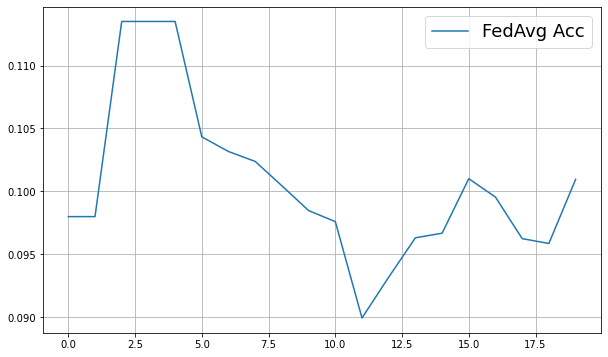

In [7]:
average_acc_list = []

for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

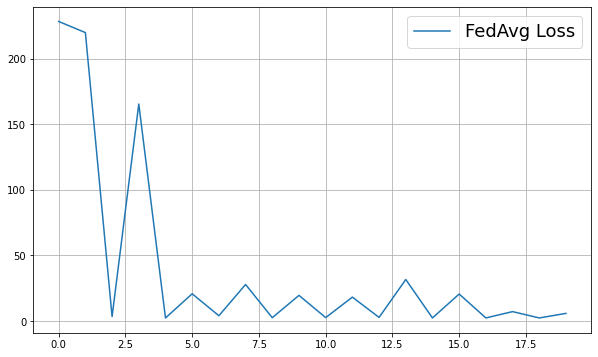

In [8]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()